In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1WwwB_-jxzNQaxWzaG-ZEcrEGFvoUJIrE'}) 
downloaded.GetContentFile('data.csv')  

dataset = pd.read_csv('data.csv', low_memory = False, dtype='unicode', usecols = ['V012', 'V014', 'V015', 'V024', 'V025', 'V026', 'V042', 'V101', 'V102', 'V103', 'V104', 'V105A', 'V106', 'V107', 'V119', 'V130', 'V131', 'V133', 'V136', 'V149', 'V150', 'V151', 'V153', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V166', 'V169A', 'V169B', 'V170', 'V171A', 'V171B', 'V190', 'V190A', 'V191', 'V201', 'V208', 'V209', 'V210', 'V211', 'V212', 'V217', 'V238', 'V394', 'V401', 'V417', 'V437', 'V438', 'V439', 'V445', 'V447A', 'V457', 'V467A', 'V467C', 'V467D', 'V481', 'V501', 'V701', 'V702', 'V705', 'V714', 'V717', 'V721', 'V731', 'V732', 'V741', 'M15', 'M17', 'M17A', 'M19', 'M61', 'M65A', 'M69', 'M73', 'M74', 'HW56', 'HW57', 'S234', 'S235', 'S239', 'S240', 'S241', 'S242', 'S243', 'S244', 'S244A', 'S244B', 'S245A', 'S245C', 'S245D', 'S245E', 'S245F', 'S245H', 'S245X', 'S360A', 'S361', 'S362A', 'S362B', 'S362C', 'S362X', 'S363A', 'S363B', 'S363C', 'S363D', 'S365A', 'S365B', 'S365C', 'S365D', 'S365E', 'S365F', 'S365G', 'S365H', 'S365I', 'S365J', 'S365K', 'S365L', 'S365M', 'S365N', 'S365O', 'S365P', 'S365Q', 'S365R', 'S365S', 'S365X', 'S368', 'S369', 'S369A', 'S370A', 'S370B', 'S370C', 'S370D', 'S370E', 'S370F', 'S370G', 'S370H', 'S370I', 'S370J', 'S370K', 'S370L', 'S370X', 'S929', 'S930B', 'S931', 'S934', 'S190S', 'S191S', 'S190US', 'S191US', 'S190RS', 'S191RS', 'S414', 'S420A', 'S420B', 'S420C', 'S420D', 'S420E', 'S440A', 'S440B', 'S440C', 'S440D', 'S440E', 'S449', 'S451', 'S456A', 'S456B', 'S456C', 'S456D', 'S456E', 'S456X', 'S457', 'S458A', 'S458B', 'S458X', 'S459', 'S460', 'S471', 'S472', 'S473', 'S474', 'S475', 'S476', 'S477', 'S478', 'S479', 'S480', 'S481', 'S483A', 'S483B', 'S483C', 'S494A', 'S494B', 'S494C', 'S494D', 'S494E', 'S558', 'S566A', 'S566B', 'S566C', 'SB18S', 'SB18D', 'SB18D', 'SB20', 'SB21', 'SB56', 'SB74', 'S305', 'S306'])

In [ ]:
dataset.head(20)

,V012,V014,V015,V024,V025,V026,V042,V101,V102,V103,...,S483C,S494A,S494B,S494C,S494D,S494E,S558,S566A,S566B,S566C
0,38,1,1,1,2,,1,1,2,,...,,1,1,1,1,1,0,,,
1,39,1,1,1,2,,1,1,2,,...,,1,1,1,1,1,1,1,0,0
2,35,1,1,1,2,,1,1,2,,...,1,0,0,0,0,0,1,1,1,1
3,30,1,1,1,2,,1,1,2,,...,,0,0,0,0,0,1,1,0,0
4,32,1,1,1,2,,1,1,2,,...,,0,0,0,0,0,0,,,
5,29,1,1,1,2,,1,1,2,,...,,0,0,0,0,0,0,,,
6,28,1,1,1,2,,1,1,2,,...,,1,1,1,1,1,1,1,1,1
7,47,1,1,1,2,,1,1,2,,...,,1,1,1,1,1,1,,,
8,32,1,1,1,2,,1,1,2,,...,,1,1,1,1,1,1,1,1,1
9,36,1,1,1,2,,1,1,2,,...,,1,1,1,1,1,,1,1,1


In [ ]:
dataset.shape

(232920, 210)

In [ ]:
#Columns relevant to the problem
cols = ['V012', 'V014', 'V015', 'V024', 'V025', 'V026', 'V042', 'V101', 'V102', 'V103', 'V104', 'V105A', 'V106', 'V107', 'V119', 'V130', 'V131', 'V133', 'V136', 'V149', 'V150', 'V151', 'V153', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V166', 'V169A', 'V169B', 'V170', 'V171A', 'V171B', 'V190', 'V190A', 'V191', 'V201', 'V208', 'V209', 'V210', 'V211', 'V212', 'V217', 'V238', 'V394', 'V401', 'V417', 'V437', 'V438', 'V439', 'V445', 'V447A', 'V457', 'V467A', 'V467C', 'V467D', 'V481', 'V501', 'V701', 'V702', 'V705', 'V714', 'V717', 'V721', 'V731', 'V732', 'V741', 'M15', 'M17', 'M17A', 'M19', 'M61', 'M65A', 'M69', 'M73', 'M74', 'HW56', 'HW57', 'S234', 'S235', 'S239', 'S240', 'S241', 'S242', 'S243', 'S244', 'S244A', 'S244B', 'S245A', 'S245C', 'S245D', 'S245E', 'S245F', 'S245H', 'S245X', 'S360A', 'S361', 'S362A', 'S362B', 'S362C', 'S362X', 'S363A', 'S363B', 'S363C', 'S363D', 'S365A', 'S365B', 'S365C', 'S365D', 'S365E', 'S365F', 'S365G', 'S365H', 'S365I', 'S365J', 'S365K', 'S365L', 'S365M', 'S365N', 'S365O', 'S365P', 'S365Q', 'S365R', 'S365S', 'S365X', 'S368', 'S369', 'S369A', 'S370A', 'S370B', 'S370C', 'S370D', 'S370E', 'S370F', 'S370G', 'S370H', 'S370I', 'S370J', 'S370K', 'S370L', 'S370X', 'S929', 'S930B', 'S931', 'S934', 'S190S', 'S191S', 'S190US', 'S191US', 'S190RS', 'S191RS', 'S414', 'S420A', 'S420B', 'S420C', 'S420D', 'S420E', 'S440A', 'S440B', 'S440C', 'S440D', 'S440E', 'S449', 'S451', 'S456A', 'S456B', 'S456C', 'S456D', 'S456E', 'S456X', 'S457', 'S458A', 'S458B', 'S458X', 'S459', 'S460', 'S471', 'S472', 'S473', 'S474', 'S475', 'S476', 'S477', 'S478', 'S479', 'S480', 'S481', 'S483A', 'S483B', 'S483C', 'S494A', 'S494B', 'S494C', 'S494D', 'S494E', 'S558', 'S566A', 'S566B', 'S566C', 'SB18S', 'SB18D', 'SB20', 'SB21', 'SB56', 'SB74', 'S305', 'S306']

In [ ]:
#Using the built in Numpy function to replace all the Empty values with np.nan
df = dataset.replace(r'^\s*$', np.nan, regex=True)
df.head(20)
  

,V012,V014,V015,V024,V025,V026,V042,V101,V102,V103,...,S483C,S494A,S494B,S494C,S494D,S494E,S558,S566A,S566B,S566C
0,38,1,1,1,2,NaN,1,1,2,NaN,...,NaN,1,1,1,1,1,0,NaN,NaN,NaN
1,39,1,1,1,2,NaN,1,1,2,NaN,...,NaN,1,1,1,1,1,1,1,0,0
2,35,1,1,1,2,NaN,1,1,2,NaN,...,1,0,0,0,0,0,1,1,1,1
3,30,1,1,1,2,NaN,1,1,2,NaN,...,NaN,0,0,0,0,0,1,1,0,0
4,32,1,1,1,2,NaN,1,1,2,NaN,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN
5,29,1,1,1,2,NaN,1,1,2,NaN,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN
6,28,1,1,1,2,NaN,1,1,2,NaN,...,NaN,1,1,1,1,1,1,1,1,1
7,47,1,1,1,2,NaN,1,1,2,NaN,...,NaN,1,1,1,1,1,1,NaN,NaN,NaN
8,32,1,1,1,2,NaN,1,1,2,NaN,...,NaN,1,1,1,1,1,1,1,1,1
9,36,1,1,1,2,NaN,1,1,2,NaN,...,NaN,1,1,1,1,1,NaN,1,1,1


<Axes: >

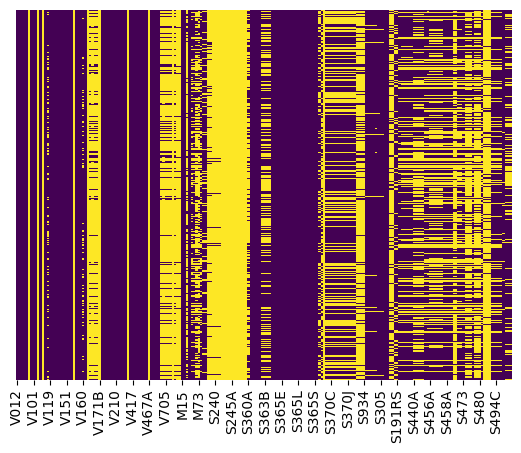

In [ ]:
#for checking na values in data set
#This plot shows the frequency of missing values in a column as a heatmap
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Function to remove all the columns from the data where the number
# of missing values is more than 1000
# This is done because the reliability of those columns would not be preserved
#after handling the missing values, since the number of missing values is very large
count = 0
sparse_cols = []
df2 = df
for i in range(210):
  missing_val = df[cols[i]].isnull().sum()
  if(missing_val>500):
    sparse_cols = np.append(sparse_cols, cols[i])
    
    df2.drop([cols[i]], inplace=True, axis=1)
    count+=1
#This shows the names of the columns with more than 10k missing values
print("coulmns with more than 10k missing values: ", sparse_cols)


coulmns with more than 10k missing values:  ['V026' 'V103' 'V105A' 'V107' 'V156' 'V160' 'V166' 'V169A' 'V169B' 'V170'
 'V171A' 'V171B' 'V394' 'V467A' 'V701' 'V702' 'V705' 'V714' 'V717' 'V721'
 'V731' 'V732' 'V741' 'M17A' 'M61' 'M65A' 'M69' 'M73' 'M74' 'HW56' 'HW57'
 'S234' 'S235' 'S239' 'S240' 'S241' 'S242' 'S243' 'S244' 'S244A' 'S244B'
 'S245A' 'S245C' 'S245D' 'S245E' 'S245F' 'S245H' 'S245X' 'S360A' 'S363A'
 'S363B' 'S363C' 'S363D' 'S368' 'S369' 'S369A' 'S370A' 'S370B' 'S370C'
 'S370D' 'S370E' 'S370F' 'S370G' 'S370H' 'S370I' 'S370J' 'S370K' 'S370L'
 'S370X' 'S929' 'S930B' 'S931' 'S934' 'S190US' 'S191US' 'S190RS' 'S191RS'
 'S414' 'S420A' 'S420B' 'S420C' 'S420D' 'S420E' 'S440A' 'S440B' 'S440C'
 'S440D' 'S440E' 'S449' 'S451' 'S456A' 'S456B' 'S456C' 'S456D' 'S456E'
 'S456X' 'S457' 'S458A' 'S458B' 'S458X' 'S459' 'S460' 'S471' 'S472' 'S473'
 'S474' 'S475' 'S476' 'S477' 'S478' 'S479' 'S480' 'S481' 'S483A' 'S483B'
 'S483C' 'S494A' 'S494B' 'S494C' 'S494D' 'S494E' 'S558' 'S566A' 'S566B'
 'S566C

In [ ]:
df2.shape

(232920, 77)

<Axes: >

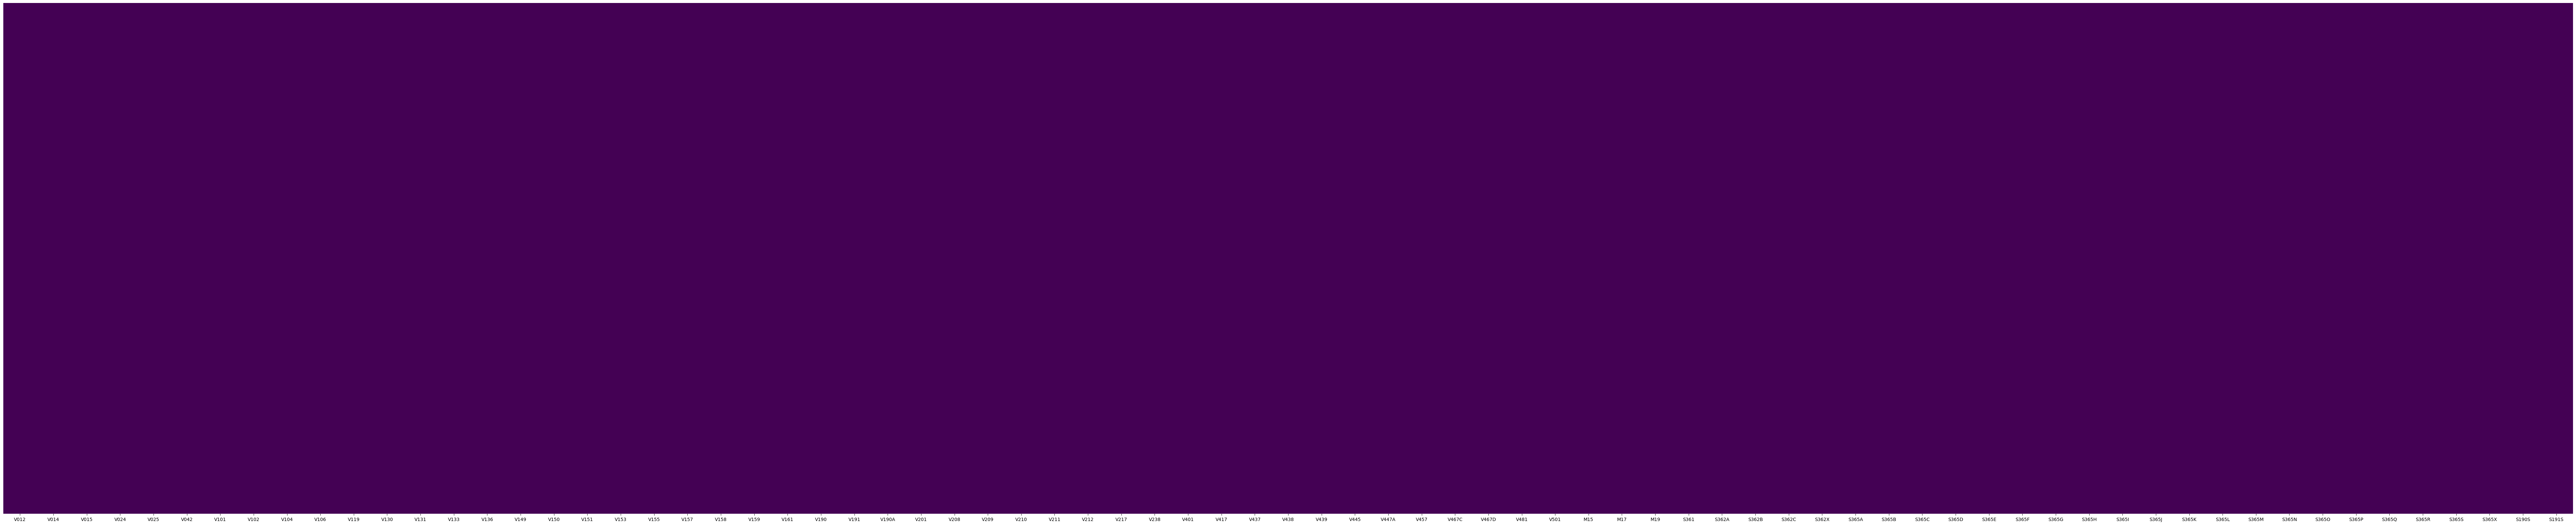

In [ ]:
#for checking na values in reduced data set
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(100,20))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#As we can see, the columns with a large number of missing values have been eliminated
#And we have a cleaner dataset

In [ ]:
continous_cols = ['V012', 'V104', 'V133', 'V136', 'V191', 'V201', 'V209', 'V210', 'V212', 'V238', 'V417', 'V437', 'V438', 'V445', 'V447A', 'M19','S191S']

In [ ]:
#sample with 25% of rows from each state
#We are doing random sampling of the data where we are taking 25% of the values 
#From each state to preserve the proportion of records
fdf = pd.DataFrame()
for x in range(37):
    dff = df2.loc[df2['V024']==str(x+1)]
    sample = dff.sample(frac=0.25)
    fdf = pd.concat([fdf, sample])
fdf

,V012,V014,V015,V024,V025,V042,V101,V102,V104,V106,...,S365M,S365N,S365O,S365P,S365Q,S365R,S365S,S365X,S190S,S191S
5341,26,1,1,1,2,1,1,2,8,2,...,0,0,0,0,0,0,0,0,5,1238450
663,32,1,1,1,2,1,1,2,7,0,...,0,0,0,0,0,0,0,0,1,-517550
876,39,1,1,1,2,1,1,2,6,2,...,0,0,0,0,0,0,0,0,4,895930
2596,24,1,1,1,2,1,1,2,2,2,...,0,0,0,0,0,0,0,0,2,79190
3536,34,1,1,1,2,1,1,2,10,2,...,0,0,0,0,0,0,0,0,1,-638380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232413,30,1,1,37,2,1,37,2,30,3,...,0,0,0,0,0,0,0,0,3,35110
232744,25,1,1,37,2,1,37,2,5,0,...,0,0,0,0,0,0,0,0,1,-925641
232832,28,1,1,37,2,1,37,2,19,3,...,0,0,0,0,0,0,0,0,4,462900
232619,26,1,1,37,1,1,37,1,5,0,...,0,0,0,0,0,0,0,0,4,625300


In [ ]:
#Normalising all the columns in the reduced dataset using minmax normalisation
#technique, the categorical variables are not normalised here
fdf = fdf.astype(str).astype(float)
fdf[continous_cols] = (fdf[continous_cols] - fdf[continous_cols].min()) / (fdf[continous_cols].max() - fdf[continous_cols].min())*10
fdf



,V012,V014,V015,V024,V025,V042,V101,V102,V104,V106,...,S365M,S365N,S365O,S365P,S365Q,S365R,S365S,S365X,S190S,S191S
5341,3.235294,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.833333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.646024
663,5.000000,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.729167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.110327
876,7.058824,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.625000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.956362
2596,2.647059,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.208333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.311860
3536,5.588235,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.041667,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.867037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232413,4.411765,1.0,1.0,37.0,2.0,1.0,37.0,2.0,3.125000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.223105
232744,2.941176,1.0,1.0,37.0,2.0,1.0,37.0,2.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.288638
232832,3.823529,1.0,1.0,37.0,2.0,1.0,37.0,2.0,1.979167,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.084458
232619,3.235294,1.0,1.0,37.0,1.0,1.0,37.0,1.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.411450


In [ ]:
fdf1 = df2
fdf1 = fdf1.astype(str).astype(float)
fdf1[continous_cols] = (fdf1[continous_cols] - fdf1[continous_cols].min()) / (fdf1[continous_cols].max() - fdf1[continous_cols].min())*10
fdf1 = pd.DataFrame(fdf)
fdf1[continous_cols] = fdf1[continous_cols].fillna(fdf1[continous_cols].mean())
fdf1 = fdf1.fillna(fdf1.mode())
fdf1 = fdf1.dropna()

M17 = fdf1['M17']
fdf1.drop(['M17'], inplace = True, axis = 1)
fdf1 = pd.concat([fdf1, M17], axis = 1)

def combine_categories(cat1, cat2, cat3):
    if cat1 == 3 or cat2 == 3 or cat3 == 3 or cat1 == 2 or cat2 == 2 or cat3 == 2:
        return 2
    elif  cat1 == 1 or cat2 == 1 or cat3 == 1:
        return 1
    elif cat1 == 0 and cat2 == 0 and cat3 == 0:
        return 0

# apply the function to the three categorical columns and create a new column with the combined values
fdf1["media"] = fdf1.apply(lambda row: combine_categories(row['V157'], row['V158'], row['V159']), axis=1)
fdf1.drop(['V157'], inplace= True, axis = 1)

fdf1.drop(['V158'], inplace= True, axis = 1)
fdf1.drop(['V159'], inplace= True, axis = 1)
fdf1

,V012,V014,V015,V024,V025,V042,V101,V102,V104,V106,...,S365O,S365P,S365Q,S365R,S365S,S365X,S190S,S191S,M17,media
5341,3.235294,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.833333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.646024,0.0,1
663,5.000000,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.729167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.110327,0.0,1
876,7.058824,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.625000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.956362,0.0,2
2596,2.647059,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.208333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.311860,1.0,0
3536,5.588235,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.041667,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.867037,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232413,4.411765,1.0,1.0,37.0,2.0,1.0,37.0,2.0,3.125000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.223105,1.0,2
232744,2.941176,1.0,1.0,37.0,2.0,1.0,37.0,2.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.288638,0.0,2
232832,3.823529,1.0,1.0,37.0,2.0,1.0,37.0,2.0,1.979167,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.084458,0.0,0
232619,3.235294,1.0,1.0,37.0,1.0,1.0,37.0,1.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.411450,1.0,2


In [ ]:
#Filling in the missing values, mean for continous columns and mode for categorical columns

fdf = pd.DataFrame(fdf)
fdf[continous_cols] = fdf[continous_cols].fillna(fdf[continous_cols].mean())
fdf = fdf.fillna(fdf.mode())
fdf = fdf.dropna()


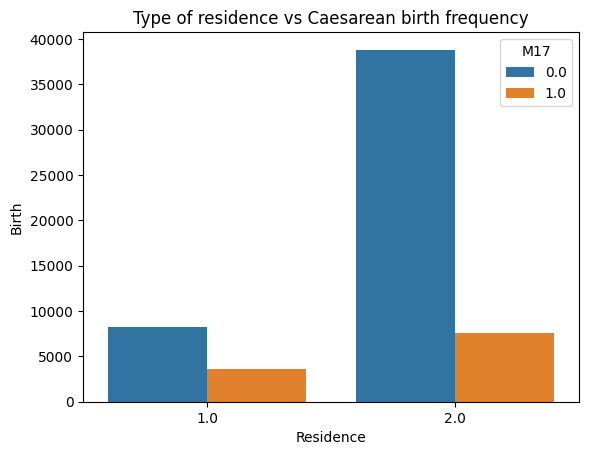

In [ ]:
#Exploratory data vizualisation
#Here we are plotting the Frequency of Caesarean and non Caesarean births as it 
#relates to the subject living in Rural or Urban places.
#Here the blue bar represents normal birth and orange represents Caesarean
# Residence value 1 indicates Urban and 2 indicates Rural
# Bar plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=fdf, x="V025", hue="M17")
plt.title('Type of residence vs Caesarean birth frequency')
plt.xlabel('Residence')
plt.ylabel('Birth')
plt.show()

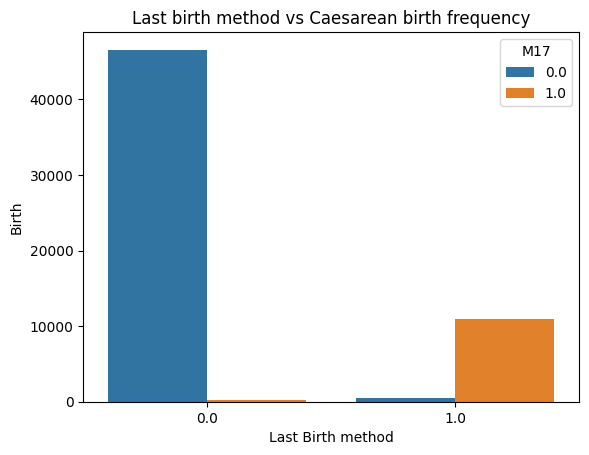

In [ ]:
#Exploratory data vizualisation
#Here we are plotting the Last birth method and non Caesarean births
#Here the blue bar represents normal birth and orange represents Caesarean
#Last birth value 1 represents Caesarean 0 represents Normal birth
# Bar plot
sns.countplot(data=fdf, x="V401", hue="M17")
plt.title('Last birth method vs Caesarean birth frequency')
plt.xlabel('Last Birth method')
plt.ylabel('Birth')
plt.show()

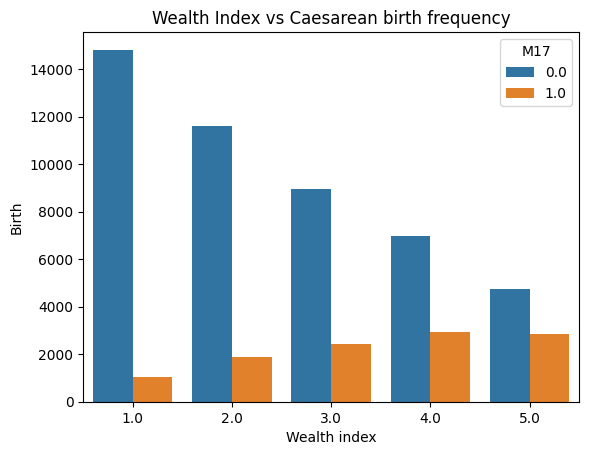

In [ ]:
#Exploratory data vizualisation
#Here we are plotting the Frequency of Caesarean and non Caesarean births as it 
#relates to the subject's economic status
#Here the blue bar represents normal birth and orange represents Caesarean
#Wealth index value represents the economic standing of the subject with 1 being poorest and 5 being richest.
# Bar plot
sns.countplot(data=fdf, x="V190", hue="M17")
plt.title('Wealth Index vs Caesarean birth frequency')
plt.xlabel('Wealth index')
plt.ylabel('Birth')
plt.show()

In [ ]:
M17 = fdf['M17']
fdf.drop(['M17'], inplace = True, axis = 1)
fdf = pd.concat([fdf, M17], axis = 1)
fdf


,V012,V014,V015,V024,V025,V042,V101,V102,V104,V106,...,S365N,S365O,S365P,S365Q,S365R,S365S,S365X,S190S,S191S,M17
5341,3.235294,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.833333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.646024,0.0
663,5.000000,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.729167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.110327,0.0
876,7.058824,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.625000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.956362,0.0
2596,2.647059,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.208333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.311860,1.0
3536,5.588235,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.041667,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.867037,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232413,4.411765,1.0,1.0,37.0,2.0,1.0,37.0,2.0,3.125000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.223105,1.0
232744,2.941176,1.0,1.0,37.0,2.0,1.0,37.0,2.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.288638,0.0
232832,3.823529,1.0,1.0,37.0,2.0,1.0,37.0,2.0,1.979167,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.084458,0.0
232619,3.235294,1.0,1.0,37.0,1.0,1.0,37.0,1.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.411450,1.0


In [ ]:
column_headers = list(fdf.columns.values)
print("The Column Header :", column_headers)

categorical_cols = [p for p in column_headers if p not in continous_cols]
print(categorical_cols)

The Column Header : ['V012', 'V014', 'V015', 'V024', 'V025', 'V042', 'V101', 'V102', 'V104', 'V106', 'V119', 'V130', 'V131', 'V133', 'V136', 'V149', 'V150', 'V151', 'V153', 'V155', 'V157', 'V158', 'V159', 'V161', 'V190', 'V191', 'V190A', 'V201', 'V208', 'V209', 'V210', 'V211', 'V212', 'V217', 'V238', 'V401', 'V417', 'V437', 'V438', 'V439', 'V445', 'V447A', 'V457', 'V467C', 'V467D', 'V481', 'V501', 'M15', 'M19', 'S361', 'S362A', 'S362B', 'S362C', 'S362X', 'S365A', 'S365B', 'S365C', 'S365D', 'S365E', 'S365F', 'S365G', 'S365H', 'S365I', 'S365J', 'S365K', 'S365L', 'S365M', 'S365N', 'S365O', 'S365P', 'S365Q', 'S365R', 'S365S', 'S365X', 'S190S', 'S191S', 'M17']
['V014', 'V015', 'V024', 'V025', 'V042', 'V101', 'V102', 'V106', 'V119', 'V130', 'V131', 'V149', 'V150', 'V151', 'V153', 'V155', 'V157', 'V158', 'V159', 'V161', 'V190', 'V190A', 'V208', 'V211', 'V217', 'V401', 'V439', 'V457', 'V467C', 'V467D', 'V481', 'V501', 'M15', 'S361', 'S362A', 'S362B', 'S362C', 'S362X', 'S365A', 'S365B', 'S365C'

In [ ]:
#Doing the Chi-Square correlation analysis between the target variable and the categorical 
#independent variables to find the statistically significant variables.

y = fdf['M17']
features = categorical_cols
from scipy import stats

# Create a contingency table for each feature and target variable
chi2_stat = []
p_val = []
for feature in features:
    obs = pd.crosstab(fdf[feature], y)
    obs = obs.values
    row_sum = obs.sum(axis=1)
    col_sum = obs.sum(axis=0)
    total = obs.sum()
    exp = np.outer(row_sum, col_sum) / total
    chi2 = ((obs - exp)**2 / exp).sum()
    dof = (obs.shape[0] - 1) * (obs.shape[1] - 1)
    p = 1 - stats.chi2.cdf(chi2, dof)
    chi2_stat.append(chi2)
    p_val.append(p)

# Create a dataframe to store the results
results = pd.DataFrame({'feature': features, 'chi2_stat': chi2_stat, 'p_val': p_val})

# Sort the features based on their p-values in ascending order
results_sorted = results.sort_values(by=['p_val'])

# Select the top k features with the lowest p-values
k = 20
chi_selected_features = results_sorted['feature'][:k].tolist()


# Rank the features based on correlation with the target variable
corr_results = fdf.corr()['M17']
corr_selected_features = corr_results.abs().sort_values(ascending=False)[:20].index.tolist()
corr_selected_features

# Combine the selected features using the union method
#We took the first 20 features from both the techniques and are now using the unioun of the two features for further analysis.
selected_features = list(set(corr_selected_features + chi_selected_features))
selected_features.remove('M17')
selected_features.insert(25, 'V445')
selected_features


['V155',
 'V401',
 'V158',
 'V190A',
 'V149',
 'V191',
 'V101',
 'V467D',
 'V217',
 'V190',
 'V133',
 'S190S',
 'S362B',
 'V161',
 'V159',
 'V014',
 'V102',
 'V157',
 'V106',
 'S191S',
 'V025',
 'V212',
 'V208',
 'V201',
 'V467C',
 'V445',
 'V024',
 'M15',
 'V211',
 'S365A']

In [ ]:
selected_features.insert(20, 'M17')
selected_features

['V155',
 'V401',
 'V158',
 'V190A',
 'V149',
 'V191',
 'V101',
 'V467D',
 'V217',
 'V190',
 'V133',
 'S190S',
 'S362B',
 'V161',
 'V159',
 'V014',
 'V102',
 'V157',
 'V106',
 'S191S',
 'M17',
 'V025',
 'V212',
 'V208',
 'V201',
 'V467C',
 'V445',
 'V024',
 'M15',
 'V211',
 'S365A']

In [ ]:
def combine_categories(cat1, cat2, cat3):
    if cat1 == 3 or cat2 == 3 or cat3 == 3 or cat1 == 2 or cat2 == 2 or cat3 == 2:
        return 2
    elif  cat1 == 1 or cat2 == 1 or cat3 == 1:
        return 1
    elif cat1 == 0 and cat2 == 0 and cat3 == 0:
        return 0

# apply the function to the three categorical columns and create a new column with the combined values
fdf["media"] = fdf.apply(lambda row: combine_categories(row['V157'], row['V158'], row['V159']), axis=1)
fdf.drop(['V157'], inplace= True, axis = 1)



In [ ]:
fdf.drop(['V158'], inplace= True, axis = 1)
fdf.drop(['V159'], inplace= True, axis = 1)
fdf

#Here we have combined the features of having seperate access to TV, newspaper, radio
#into a single feature named media. Feature Engineering

,V012,V014,V015,V024,V025,V042,V101,V102,V104,V106,...,S365O,S365P,S365Q,S365R,S365S,S365X,S190S,S191S,M17,media
5341,3.235294,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.833333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.646024,0.0,1
663,5.000000,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.729167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.110327,0.0,1
876,7.058824,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.625000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.956362,0.0,2
2596,2.647059,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.208333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.311860,1.0,0
3536,5.588235,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.041667,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.867037,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232413,4.411765,1.0,1.0,37.0,2.0,1.0,37.0,2.0,3.125000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.223105,1.0,2
232744,2.941176,1.0,1.0,37.0,2.0,1.0,37.0,2.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.288638,0.0,2
232832,3.823529,1.0,1.0,37.0,2.0,1.0,37.0,2.0,1.979167,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.084458,0.0,0
232619,3.235294,1.0,1.0,37.0,1.0,1.0,37.0,1.0,0.520833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.411450,1.0,2


In [ ]:
#If two columns contain information on the same feature, taking only one of them for further analysis
remove = ['V024', 'V153', 'V133', 'V101', 'V190', 'V190A', 'V106', 'V157', 'V158', 'V159']
selected_features = [x for x in selected_features if x not in remove]
selected_features.insert(20, 'media')



In [ ]:
selected_features.remove('V211')
selected_features

['V155',
 'V401',
 'V149',
 'V191',
 'V467D',
 'V217',
 'S190S',
 'S362B',
 'V161',
 'V014',
 'V102',
 'S191S',
 'M17',
 'V025',
 'V212',
 'V208',
 'V201',
 'V467C',
 'V445',
 'M15',
 'media',
 'S365A']

### Implementing Logisitc Regression.

In [ ]:
fdf[selected_features]
fdf['V439'] = fdf['V439'].fillna(fdf['V439'].mean())
fdf['V439'] = (fdf['V439'] - fdf['V439'].min()) / (fdf['V439'].max() - fdf['V439'].min())*10
fdf[selected_features]



,V155,V401,V149,V191,V467D,V217,S190S,S362B,V161,V014,...,M17,V025,V212,V208,V201,V467C,V445,M15,media,S365A
5341,2.0,0.0,3.0,7.646024,0.0,5.0,5.0,0.0,2.0,1.0,...,0.0,2.0,3.055556,2.0,1.538462,0.0,1.198136,21.0,1,0.0
663,0.0,0.0,0.0,4.110327,1.0,5.0,1.0,1.0,8.0,1.0,...,0.0,2.0,4.722222,2.0,1.538462,2.0,1.207230,21.0,1,0.0
876,1.0,0.0,3.0,6.956362,2.0,4.0,4.0,1.0,2.0,1.0,...,0.0,2.0,6.944444,1.0,0.769231,2.0,1.634648,21.0,2,1.0
2596,0.0,1.0,3.0,5.311860,0.0,5.0,2.0,0.0,1.0,1.0,...,1.0,2.0,3.611111,1.0,0.000000,0.0,1.408435,21.0,0,0.0
3536,2.0,0.0,3.0,3.867037,2.0,2.0,1.0,0.0,8.0,1.0,...,0.0,2.0,4.722222,2.0,1.538462,2.0,1.518700,21.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232413,2.0,1.0,5.0,5.223105,1.0,8.0,3.0,1.0,2.0,1.0,...,1.0,2.0,3.888889,1.0,0.769231,0.0,2.006366,21.0,2,0.0
232744,0.0,0.0,0.0,3.288638,1.0,5.0,1.0,0.0,8.0,1.0,...,0.0,2.0,3.333333,1.0,0.000000,1.0,1.705127,25.0,2,0.0
232832,2.0,0.0,5.0,6.084458,0.0,2.0,4.0,0.0,1.0,1.0,...,0.0,2.0,3.611111,1.0,0.769231,0.0,2.371263,24.0,0,0.0
232619,0.0,1.0,0.0,6.411450,0.0,5.0,4.0,1.0,2.0,1.0,...,1.0,1.0,3.611111,1.0,0.000000,0.0,1.057179,21.0,2,0.0


In [ ]:


train_data = fdf[selected_features].sample(frac = 0.67, random_state = 1)
test_data = fdf[selected_features].drop(train_data.index)

# Add a bias term to the data
train_data.insert(0, 'Bias', 1)
test_data.insert(0, 'Bias', 1)
f = train_data.drop('M17', axis=1)

#Seperate the independent and taget variables in the training and testing sets
X_train = train_data.drop('M17', axis=1).values
y_train = train_data['M17'].values
X_test = test_data.drop('M17', axis=1).values
y_test = test_data['M17'].values


def sigmoid(x):
    """
    Numerically stable sigmoid function.
    """
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)

# Define the cost function
def cost_function(X, y, weights):
    h = sigmoid(X.dot(weights))
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return cost

# Define the gradient descent function
def gradient_descent(X, y, weights, alpha, num_iters):
    m = len(y)
    costs = []
    for i in range(num_iters):
        h = sigmoid(X.dot(weights))
        gradient = X.T.dot(h - y) / m
        weights -= alpha * gradient
        cost = cost_function(X, y, weights)
        costs.append(cost)
        if i % 1000 == 0:
            print("Iteration {}: Cost = {}".format(i, cost))
    return weights, costs

# Initialize the weights
num_features = X_train.shape[1]
weights = np.zeros(num_features)

# Set the learning rate and number of iterations
alpha = 0.01
num_iters = 10000

# Train the model
weights, costs = gradient_descent(X_train, y_train, weights, alpha, num_iters)

# Make predictions on the test set
y_pred = sigmoid(X_test.dot(weights))
y_pred = np.round(y_pred)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print("Accuracy = {}".format(accuracy))






Iteration 0: Cost = 0.5837819821309831
Iteration 1000: Cost = 0.2962784825674769
Iteration 2000: Cost = 0.21772707591736962
Iteration 3000: Cost = 0.17179822953848087
Iteration 4000: Cost = 0.14290439565677687
Iteration 5000: Cost = 0.12366167893468703
Iteration 6000: Cost = 0.11021797556958154
Iteration 7000: Cost = 0.10044626309262192
Iteration 8000: Cost = 0.09310829209873979
Iteration 9000: Cost = 0.08744744965329665
Accuracy = 0.9876131987092744


In the step above, we have built a predictive model for Birth type, given a set of the selected features. The following are the weights that we get for the feature set:

In [ ]:

feature_set = list(f.columns.values)
feature_weights = pd.DataFrame(list(zip(feature_set, weights)), columns = ['Feature', 'Weight'])
feature_weights


,Feature,Weight
0,Bias,-0.548193
1,V155,-0.046124
2,V401,5.084621
3,V149,0.028121
4,V191,0.007048
5,V467D,-0.061556
6,V217,-0.071779
7,S190S,-0.098750
8,S362B,-0.063710
9,V161,-0.000542


In [ ]:
def confusion(y_true, y_pred):
  a=0
  b=0
  c=0
  d=0
  m=0
  for m in range(len(y_true)):
    if(y_pred[m] == 1):
      if(y_true[m] == 1):
        a=a+1
      elif(y_true[m] == 0):
        b+=1
    if(y_pred[m] == 0):
      if(y_true[m] == 0):
        d+=1
      elif(y_true[m] == 1):
        c+=1
    cnf = np.zeros((2,2))
    cnf[0][0] = a
    cnf[0][1] = b
    cnf[1][0] = c
    cnf[1][1] = d
  return cnf
confusion(y_test, y_pred)


array([[ 3633.,   154.],
       [   84., 15343.]])

   Variable  Coefficient   P-value
0      Bias    -0.548193  0.784011
1      V155    -0.046124  0.981601
2      V401     5.084621  0.011012
3      V149     0.028121  0.988782
4      V191     0.007048  0.997188
5     V467D    -0.061556  0.975447
6      V217    -0.071779  0.971370
7     S190S    -0.098750  0.960621
8     S362B    -0.063710  0.974588
9      V161    -0.000542  0.999784
10     V014    -0.264172  0.894916
11     V102    -0.386967  0.846580
12    S191S     0.007048  0.997188
13     V025    -0.386967  0.846580
14     V212    -0.036175  0.985569
15     V208    -0.459891  0.818134
16     V201    -0.331001  0.868550
17    V467C    -0.069182  0.972406
18     V445     0.004781  0.998093
19      M15     0.017895  0.992861
20    media     0.030104  0.987991
21    S365A    -0.102119  0.959278
   Variable  Odds Ratio   Lower CI     Upper CI
0      Bias    0.577993   0.066824     4.999363
1      V155    0.954923   0.110402     8.259623
2      V401  161.518641  18.673720  1397.058096
3  

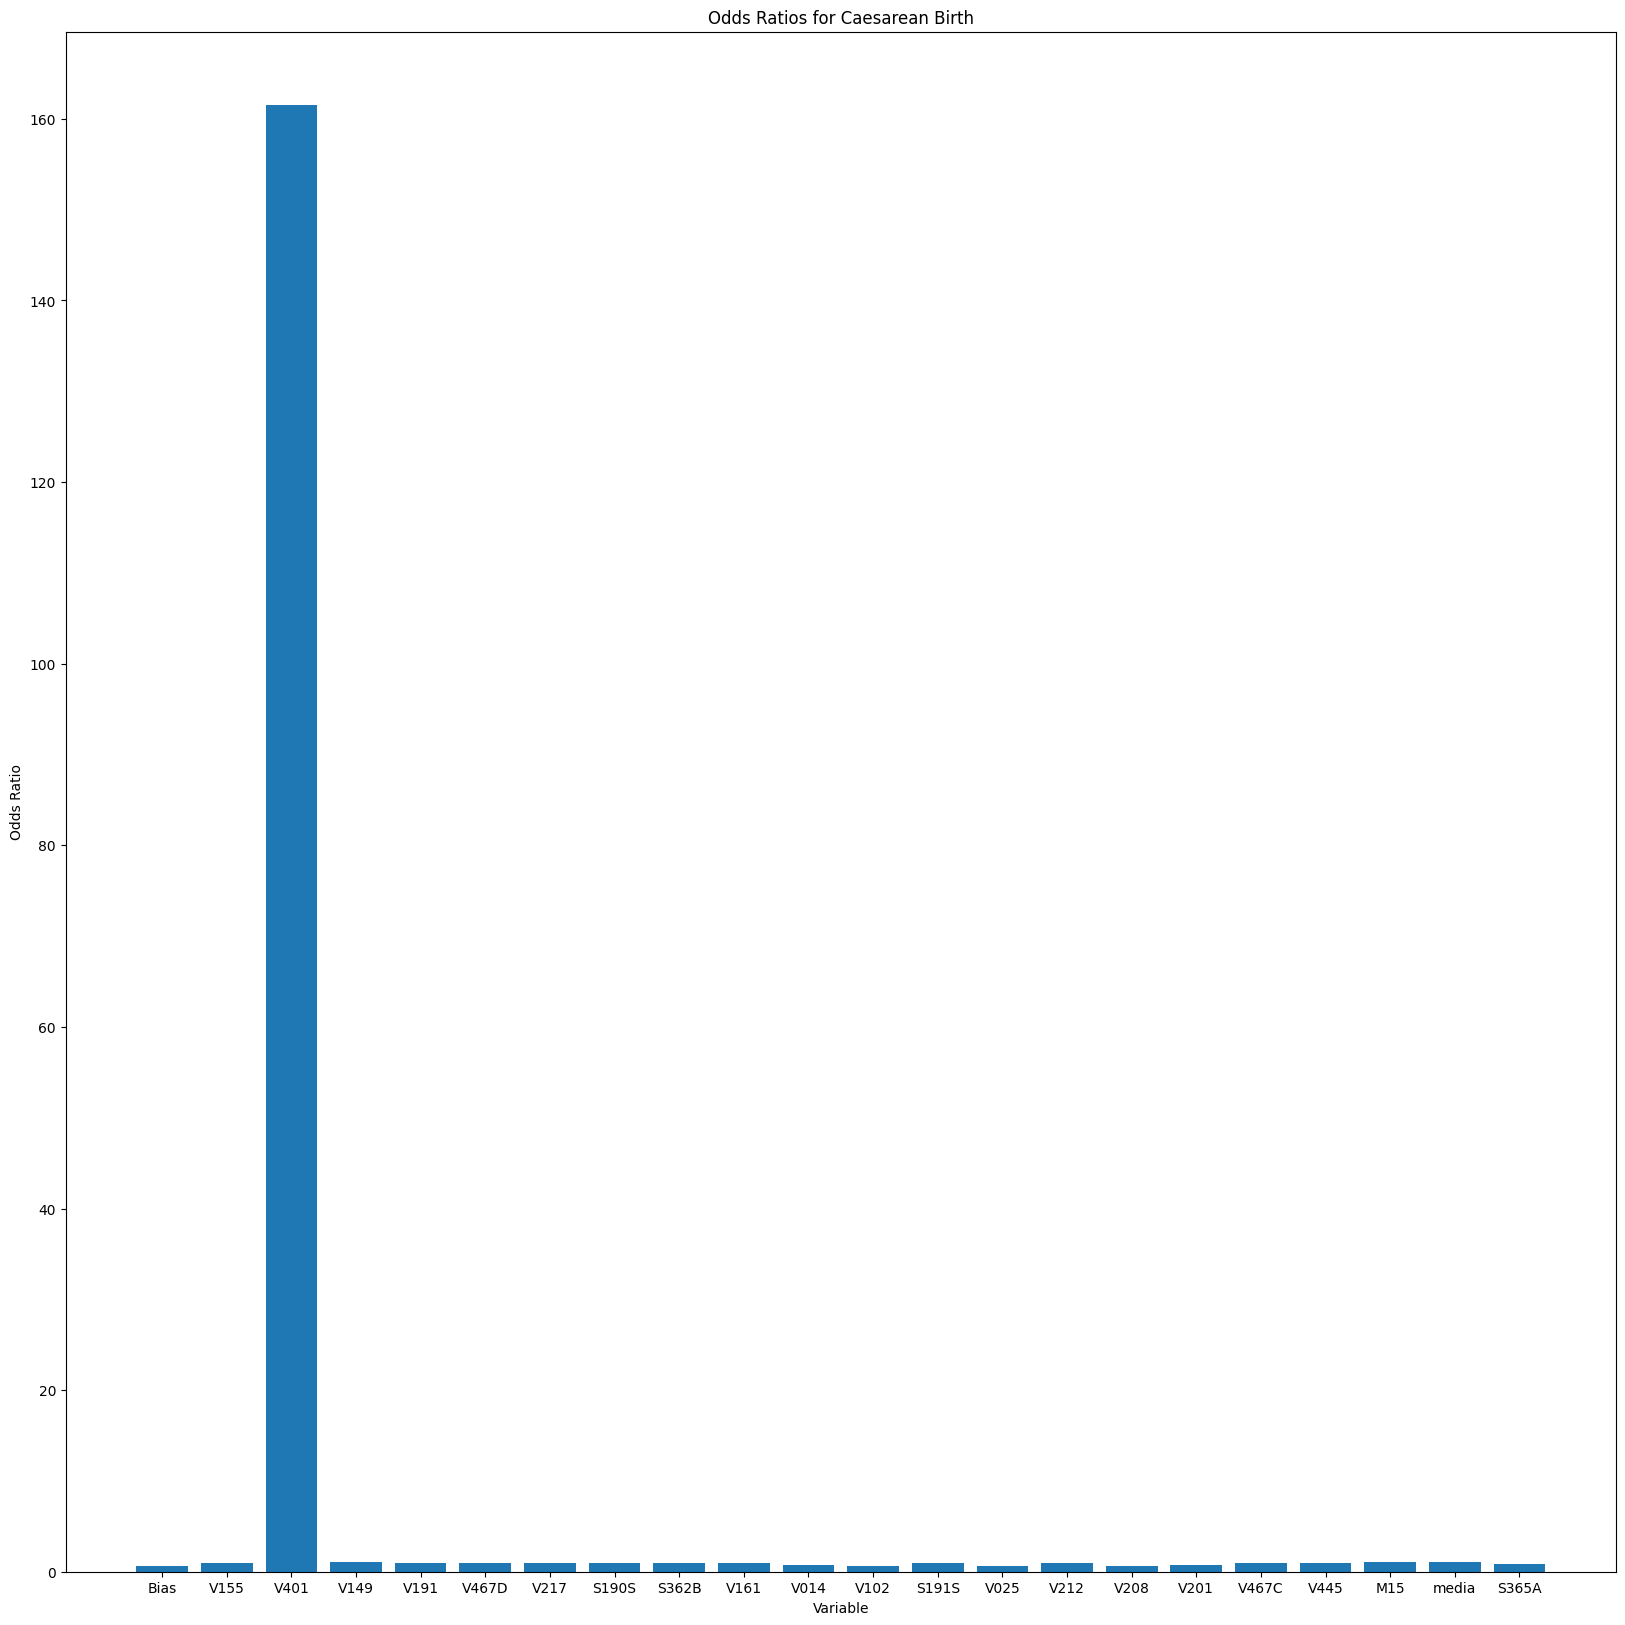

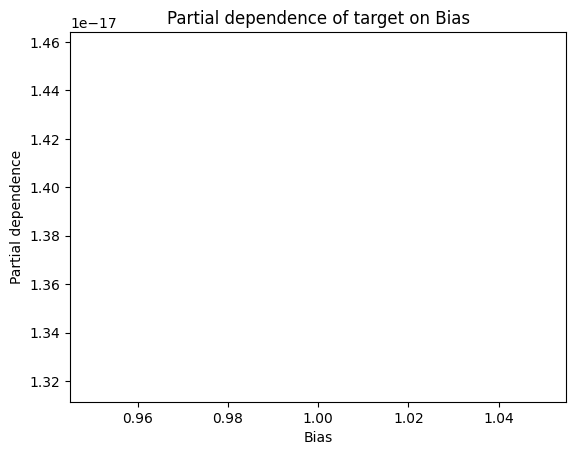

<Figure size 2000x2000 with 0 Axes>

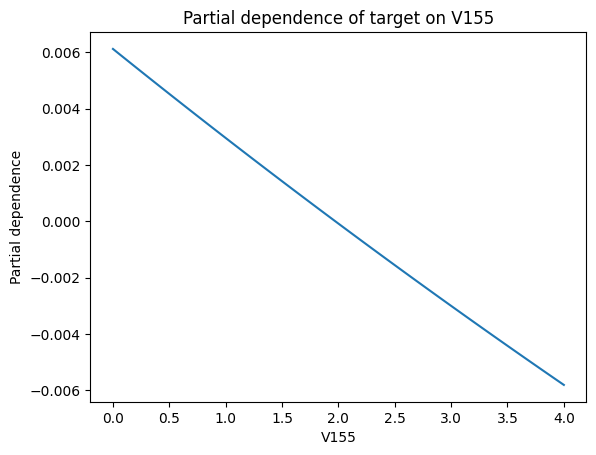

<Figure size 2000x2000 with 0 Axes>

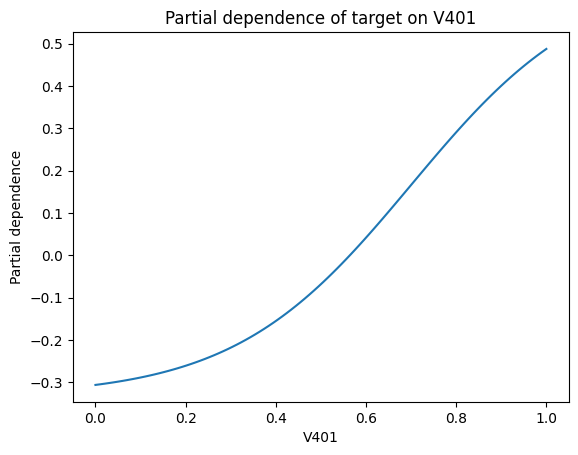

<Figure size 2000x2000 with 0 Axes>

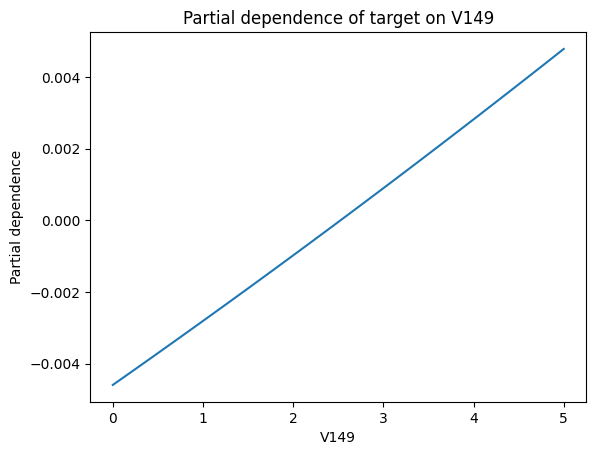

<Figure size 2000x2000 with 0 Axes>

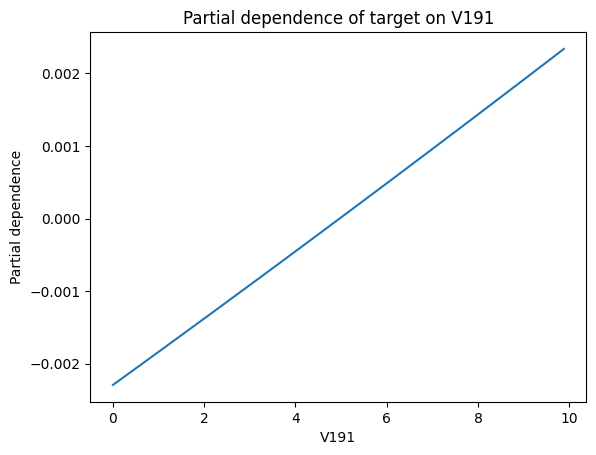

<Figure size 2000x2000 with 0 Axes>

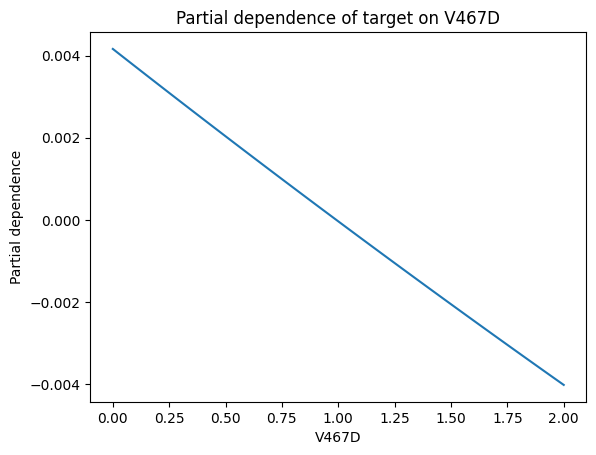

<Figure size 2000x2000 with 0 Axes>

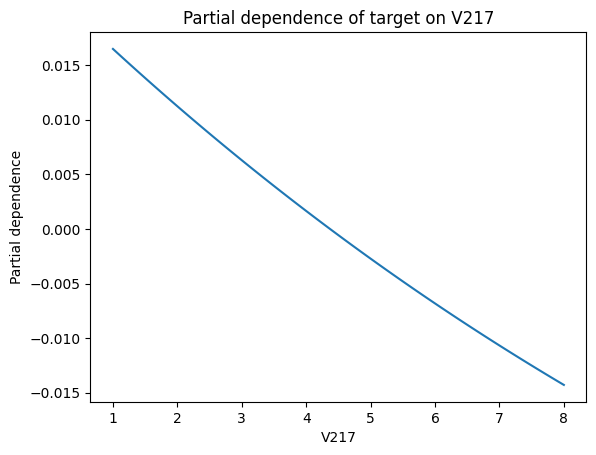

<Figure size 2000x2000 with 0 Axes>

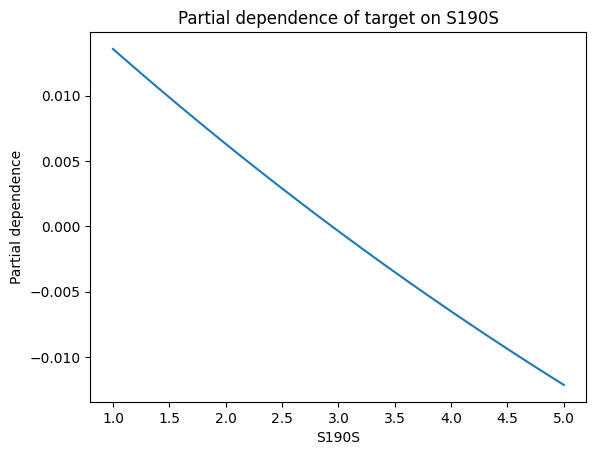

<Figure size 2000x2000 with 0 Axes>

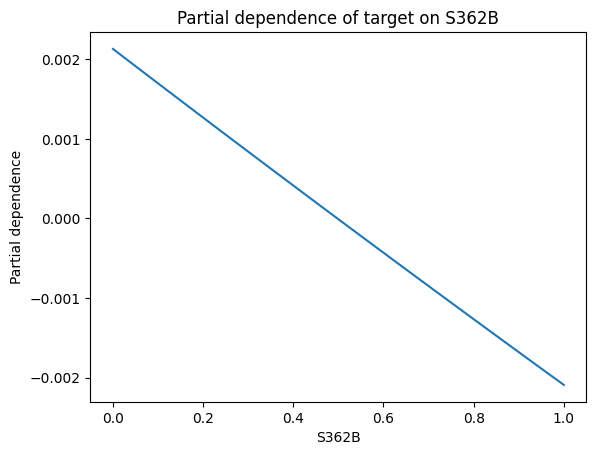

<Figure size 2000x2000 with 0 Axes>

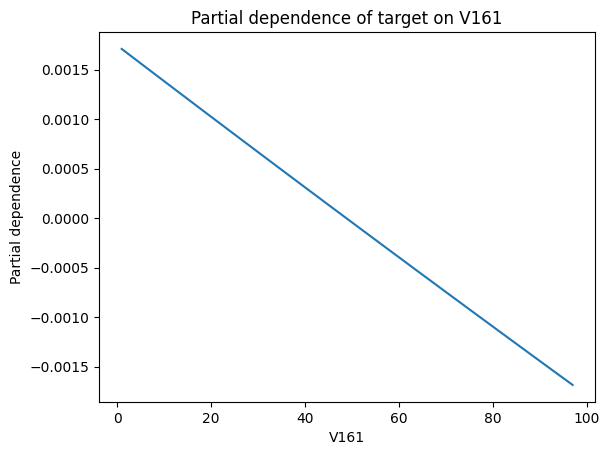

<Figure size 2000x2000 with 0 Axes>

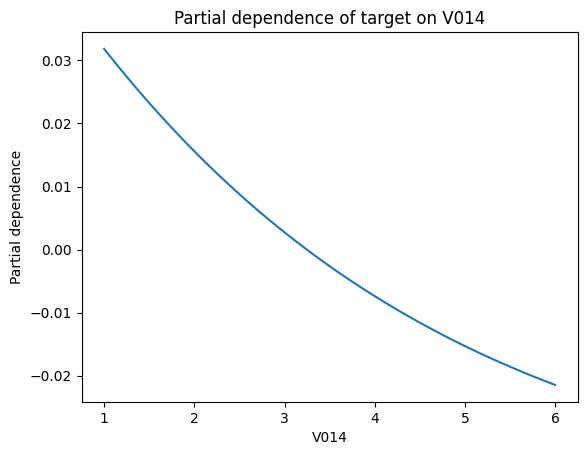

<Figure size 2000x2000 with 0 Axes>

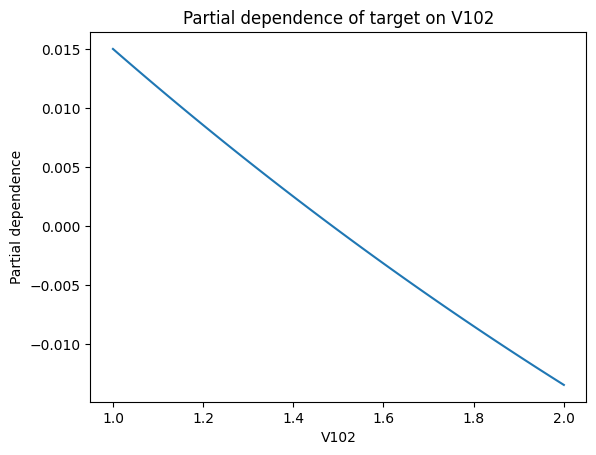

<Figure size 2000x2000 with 0 Axes>

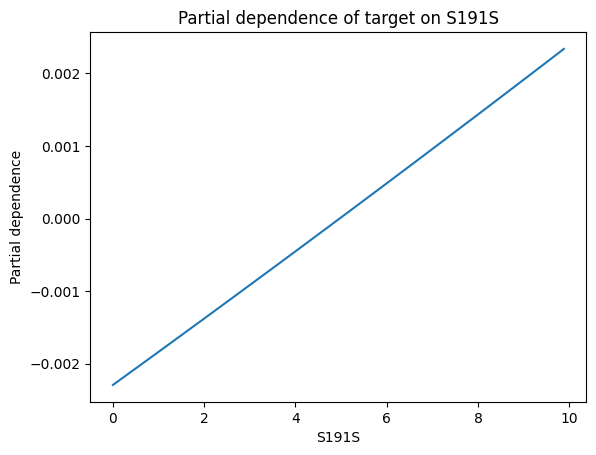

<Figure size 2000x2000 with 0 Axes>

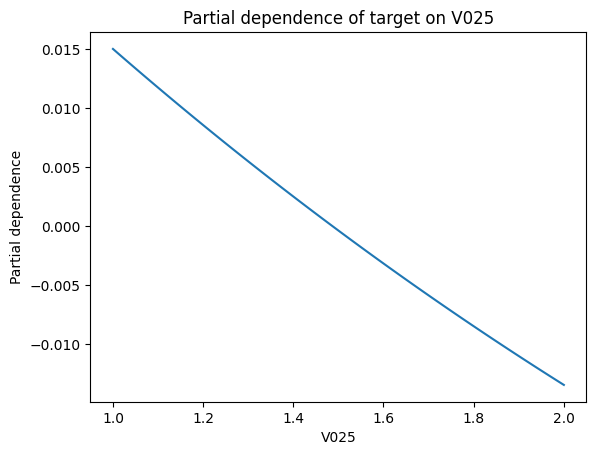

<Figure size 2000x2000 with 0 Axes>

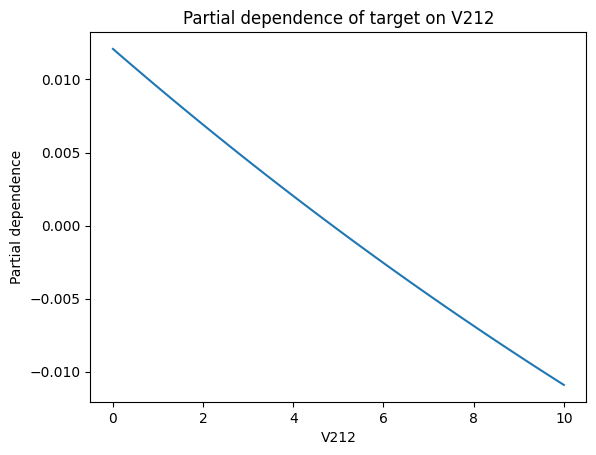

<Figure size 2000x2000 with 0 Axes>

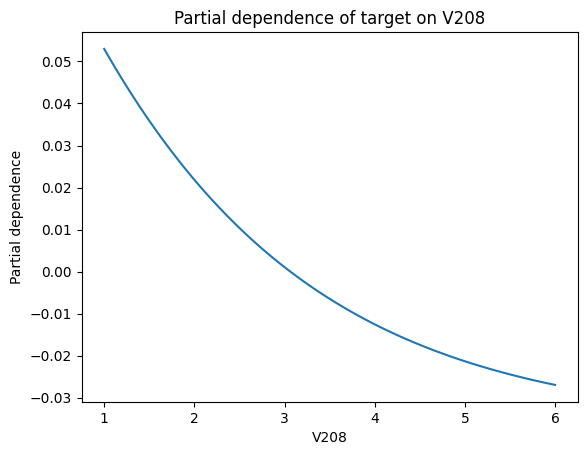

<Figure size 2000x2000 with 0 Axes>

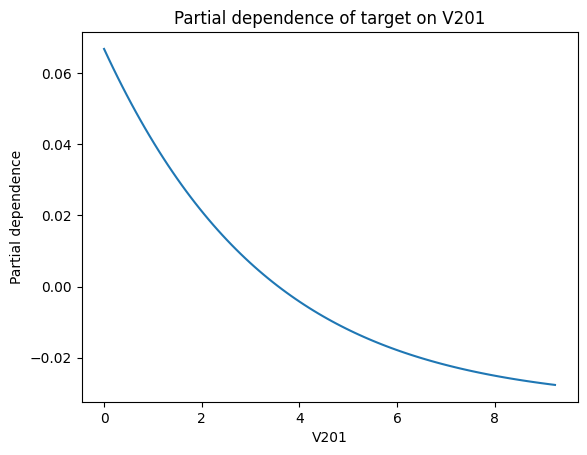

<Figure size 2000x2000 with 0 Axes>

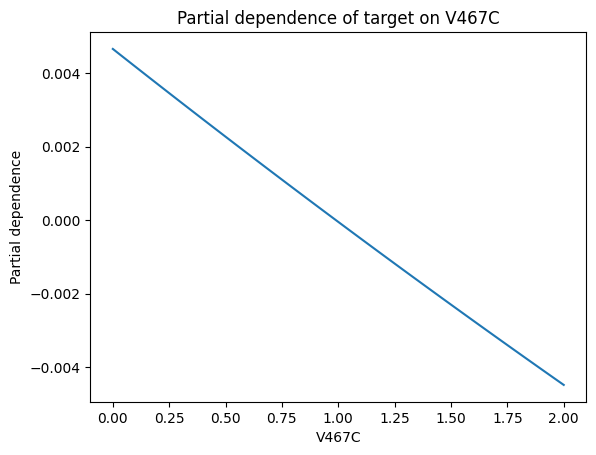

<Figure size 2000x2000 with 0 Axes>

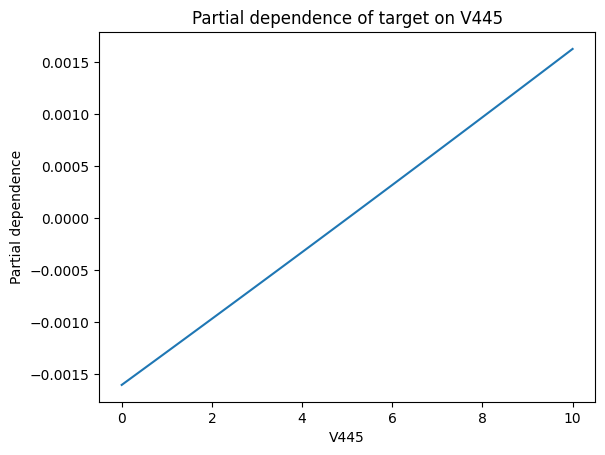

<Figure size 2000x2000 with 0 Axes>

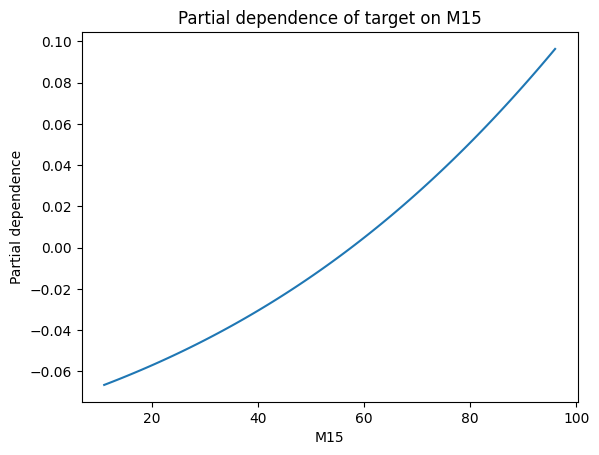

<Figure size 2000x2000 with 0 Axes>

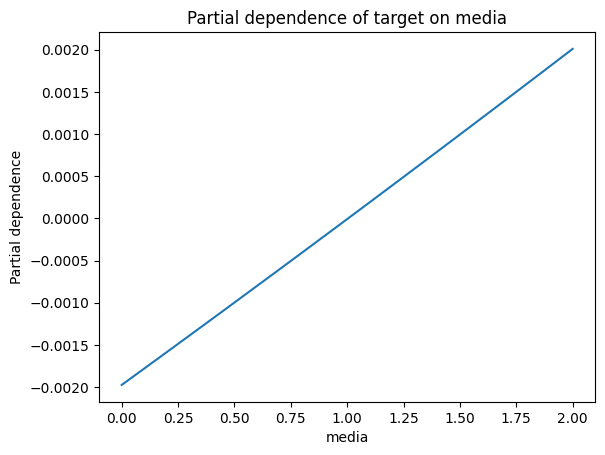

<Figure size 2000x2000 with 0 Axes>

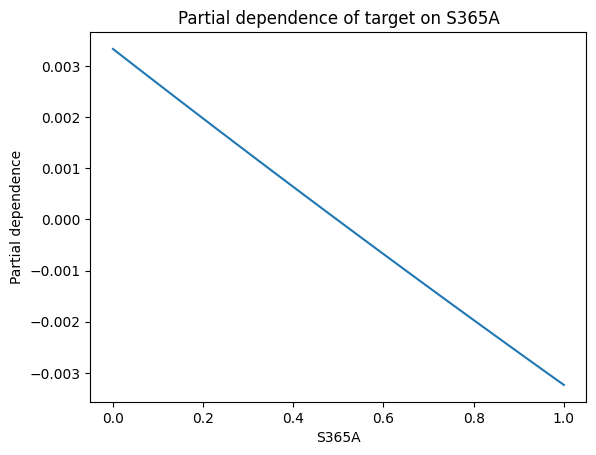

<Figure size 2000x2000 with 0 Axes>

In [ ]:
import scipy.stats as stats
# Get the coefficients and p-values from the logistic regression model
coefficients = weights
p_values = stats.norm.sf(abs(coefficients) / 2) * 2

# Create a DataFrame to store the coefficients and p-values
coefficients_df = pd.DataFrame({'Variable': feature_set, 'Coefficient': coefficients, 'P-value': p_values})

# Print the coefficients and p-values
print(coefficients_df)

# Calculate the odds ratios and confidence intervals
odds_ratios = np.exp(coefficients)
lower_ci = np.exp(coefficients - 1.96 * np.std(coefficients))
upper_ci = np.exp(coefficients + 1.96 * np.std(coefficients))

# Create a DataFrame to store the odds ratios and confidence intervals
odds_ratio_df = pd.DataFrame({'Variable': feature_set, 'Odds Ratio': odds_ratios, 'Lower CI': lower_ci, 'Upper CI': upper_ci})

# Print the odds ratios and confidence intervals
print(odds_ratio_df)

# Create a bar chart of the odds ratios
plt.subplots(figsize=(20,20))
plt.bar(feature_set, odds_ratios)
plt.xlabel('Variable')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios for Caesarean Birth')
plt.show()

# Create a partial dependence plot for the mother's age variable
from sklearn.inspection import partial_dependence


# Define function to calculate logistic regression probabilities
def logistic_regression_probabilities(X, weights):
    log_odds = np.dot(X, weights)
    probabilities = 1 / (1 + np.exp(-log_odds))
    return probabilities

# Define function to calculate partial dependence
def calculate_partial_dependence(X, feature_index, weights):
    # Set feature values to average values
    X_constant = np.mean(X, axis=0)
    # Create grid of feature values to vary
    grid = np.linspace(np.min(X[:, feature_index]), np.max(X[:, feature_index]), num=100)
    # Copy X_constant for each grid point
    X_grid = np.tile(X_constant, (len(grid), 1))
    # Set the feature values to vary according to the grid
    X_grid[:, feature_index] = grid
    # Calculate logistic regression probabilities for each grid point
    probabilities = logistic_regression_probabilities(X_grid, weights)
    # Calculate the average probability across all samples
    average_probability = np.mean(probabilities)
    # Calculate the partial dependence values for each grid point
    partial_dependence_values = probabilities - average_probability
    return grid, partial_dependence_values

# Define function to plot partial dependence
def plot_partial_dependence(X, feature_names, feature_index, weights):
    grid, partial_dependence_values = calculate_partial_dependence(X, feature_index, weights)
    plt.plot(grid, partial_dependence_values)
    plt.xlabel(feature_names[feature_index])
    plt.ylabel('Partial dependence')
    plt.title('Partial dependence of target on ' + feature_names[feature_index])
    plt.figure(figsize=(20,20))
    plt.show()

# Plot partial dependence for each feature
for i in range(X_train.shape[1]):
    plot_partial_dependence(X_train, feature_set, i, weights)

With the above plots and values of the influences of the different features that we have found from the odds ratio and dependancy plots, it is clear that the single biggest factor influencing whether a give birth will be Caesarean or Normal is the previous birth type for the given woman. Now, the influence of that single factor is so large on the model compared to the other features, that to find the finer details in the data, we will have to train another model where we only take the data points where the previous birth of the woman was Normal. 

In [ ]:
#fdf1 = fdf[fdf['V401'] == 0]
fdf1 = fdf
selected_features.remove('V401')
#Here, we have the modified dataser where we are only selecting the rows in which the previous birth type is normal(==0)

#Now we won't be using previous birth type as a feature, so removing it from the feature list.
#selected_features_new = selected_features.remove('V401') 
selected_features

['V155',
 'V149',
 'V191',
 'V467D',
 'V217',
 'S190S',
 'S362B',
 'V161',
 'V014',
 'V102',
 'S191S',
 'M17',
 'V025',
 'V212',
 'V208',
 'V201',
 'V467C',
 'V445',
 'M15',
 'media',
 'S365A']

Now Training a new model to predict the birth type without taking the previous birth type as a feature

In [ ]:


# count the number of rows with 1 and 0 in the 'col1' column
count_1 = sum(fdf['M17'] == 1)
count_0 = sum(fdf['M17'] == 0)

# select all rows with 1 value and as many rows with 0 values as 1
fdf_1 = fdf[fdf['M17'] == 1]
fdf_0 = fdf[fdf['M17'] == 0].sample(n=count_1*4)

# concatenate the selected dataframes
fdf1 = pd.concat([fdf_1, fdf_0])
fdf1 = fdf1.sample(frac = 0.25, random_state = 1)


In [ ]:
train_data = fdf1[selected_features].sample(frac = 0.67, random_state = 1)
test_data = fdf1[selected_features].drop(train_data.index)

# Add a bias term to the data
train_data.insert(0, 'Bias', 1)
test_data.insert(0, 'Bias', 1)
f = train_data.drop('M17', axis=1)

X_train = train_data.drop('M17', axis=1).values
y_train = train_data['M17'].values
X_test = test_data.drop('M17', axis=1).values
y_test = test_data['M17'].values
fdf1



,V012,V014,V015,V024,V025,V042,V101,V102,V104,V106,...,S365O,S365P,S365Q,S365R,S365S,S365X,S190S,S191S,M17,media
43252,2.352941,1.0,1.0,9.0,2.0,1.0,9.0,2.0,0.312500,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.907164,0.0,0
39788,4.705882,1.0,1.0,8.0,1.0,1.0,8.0,1.0,10.000000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,9.207348,1.0,1
95410,2.941176,1.0,1.0,10.0,2.0,1.0,10.0,2.0,0.416667,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.018188,0.0,0
218404,4.705882,1.0,1.0,33.0,2.0,1.0,33.0,2.0,0.729167,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.962438,0.0,0
143501,3.235294,1.0,1.0,20.0,2.0,1.0,20.0,2.0,0.833333,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.418326,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18672,2.058824,1.0,1.0,6.0,2.0,1.0,6.0,2.0,9.895833,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.686269,0.0,2
163567,2.352941,1.0,1.0,22.0,2.0,1.0,22.0,2.0,0.625000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.961043,0.0,0
66138,2.647059,1.0,1.0,9.0,1.0,1.0,9.0,1.0,0.416667,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.773170,0.0,1
59981,6.764706,3.0,1.0,9.0,2.0,1.0,9.0,2.0,2.083333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.548077,0.0,0


In [ ]:


train_data = fdf1[selected_features].sample(frac = 0.67, random_state = 1)
test_data = fdf1[selected_features].drop(train_data.index)

# Add a bias term to the data
train_data.insert(0, 'Bias', 1)
test_data.insert(0, 'Bias', 1)
f = train_data.drop('M17', axis=1)

#Seperate the independent and taget variables in the training and testing sets
X_train = train_data.drop('M17', axis=1).values
y_train = train_data['M17'].values
X_test = test_data.drop('M17', axis=1).values
y_test = test_data['M17'].values


def sigmoid(x):
    """
    Numerically stable sigmoid function.
    """
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)

# Define the cost function
def cost_function(X, y, weights):
    h = sigmoid(X.dot(weights))
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return cost

# Define the gradient descent function
def gradient_descent(X, y, weights, alpha, num_iters):
    m = len(y)
    costs = []
    for i in range(num_iters):
        h = sigmoid(X.dot(weights))
        gradient = X.T.dot(h - y) / m
        weights -= alpha * gradient
        cost = cost_function(X, y, weights)
        costs.append(cost)
        if i % 1000 == 0:
            print("Iteration {}: Cost = {}".format(i, cost))
    return weights, costs

# Initialize the weights
num_features = X_train.shape[1]
weights = np.zeros(num_features)

# Set the learning rate and number of iterations
alpha = 0.01
num_iters = 10000

# Train the model
weights, costs = gradient_descent(X_train, y_train, weights, alpha, num_iters)

# Define the new threshold
threshold = 0.38

# Make predictions on the test set with the new threshold
y_pred = sigmoid(X_test.dot(weights))
y_pred = (y_pred >= threshold).astype(int)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print("Accuracy = {}".format(accuracy))

Iteration 0: Cost = 0.6090601148758771
Iteration 1000: Cost = 0.4488238244885599
Iteration 2000: Cost = 0.44503951646894857
Iteration 3000: Cost = 0.44373755300928047
Iteration 4000: Cost = 0.4428521378974587
Iteration 5000: Cost = 0.44210360800623916
Iteration 6000: Cost = 0.44142825847549827
Iteration 7000: Cost = 0.44080269110177966
Iteration 8000: Cost = 0.44021491969330356
Iteration 9000: Cost = 0.43965764371213867
Accuracy = 0.7944190102463484


In [ ]:
feature_set = list(f.columns.values)
feature_weights = pd.DataFrame(list(zip(feature_set, weights)), columns = ['Feature', 'Weight'])
feature_weights

,Feature,Weight
0,Bias,-0.893929
1,V155,0.028386
2,V149,0.076123
3,V191,0.077270
4,V467D,-0.048072
5,V217,-0.012481
6,S190S,-0.163066
7,S362B,-0.054648
8,V161,-0.000724
9,V014,-0.427224


In [ ]:
def confusion(y_true, y_pred):
  a=0
  b=0
  c=0
  d=0
  m=0
  for m in range(len(y_true)):
    if(y_pred[m] == 1):
      if(y_true[m] == 1):
        a=a+1
      elif(y_true[m] == 0):
        b+=1
    if(y_pred[m] == 0):
      if(y_true[m] == 0):
        d+=1
      elif(y_true[m] == 1):
        c+=1
    cnf = np.zeros((2,2))
    cnf[0][0] = a
    cnf[0][1] = b
    cnf[1][0] = c
    cnf[1][1] = d
  return cnf
confusion(y_test, y_pred)

array([[ 357.,  354.],
       [ 589., 3287.]])

   Variable  Coefficient   P-value
0      Bias    -0.893929  0.654901
1      V155     0.028386  0.988676
2      V149     0.076123  0.969639
3      V191     0.077270  0.969182
4     V467D    -0.048072  0.980824
5      V217    -0.012481  0.995021
6     S190S    -0.163066  0.935018
7     S362B    -0.054648  0.978201
8      V161    -0.000724  0.999711
9      V014    -0.427224  0.830850
10     V102    -0.329367  0.869193
11    S191S     0.077270  0.969182
12     V025    -0.329367  0.869193
13     V212     0.099619  0.960274
14     V208    -0.474037  0.812643
15     V201    -0.371066  0.852811
16    V467C    -0.045402  0.981889
17     V445     0.034309  0.986313
18      M15     0.054672  0.978192
19    media     0.066641  0.973419
20    S365A    -0.241225  0.903998
   Variable  Odds Ratio  Lower CI  Upper CI
0      Bias    0.409045  0.251349  0.665682
1      V155    1.028793  0.632168  1.674261
2      V149    1.079096  0.663078  1.756124
3      V191    1.080333  0.663839  1.758138
4     V467

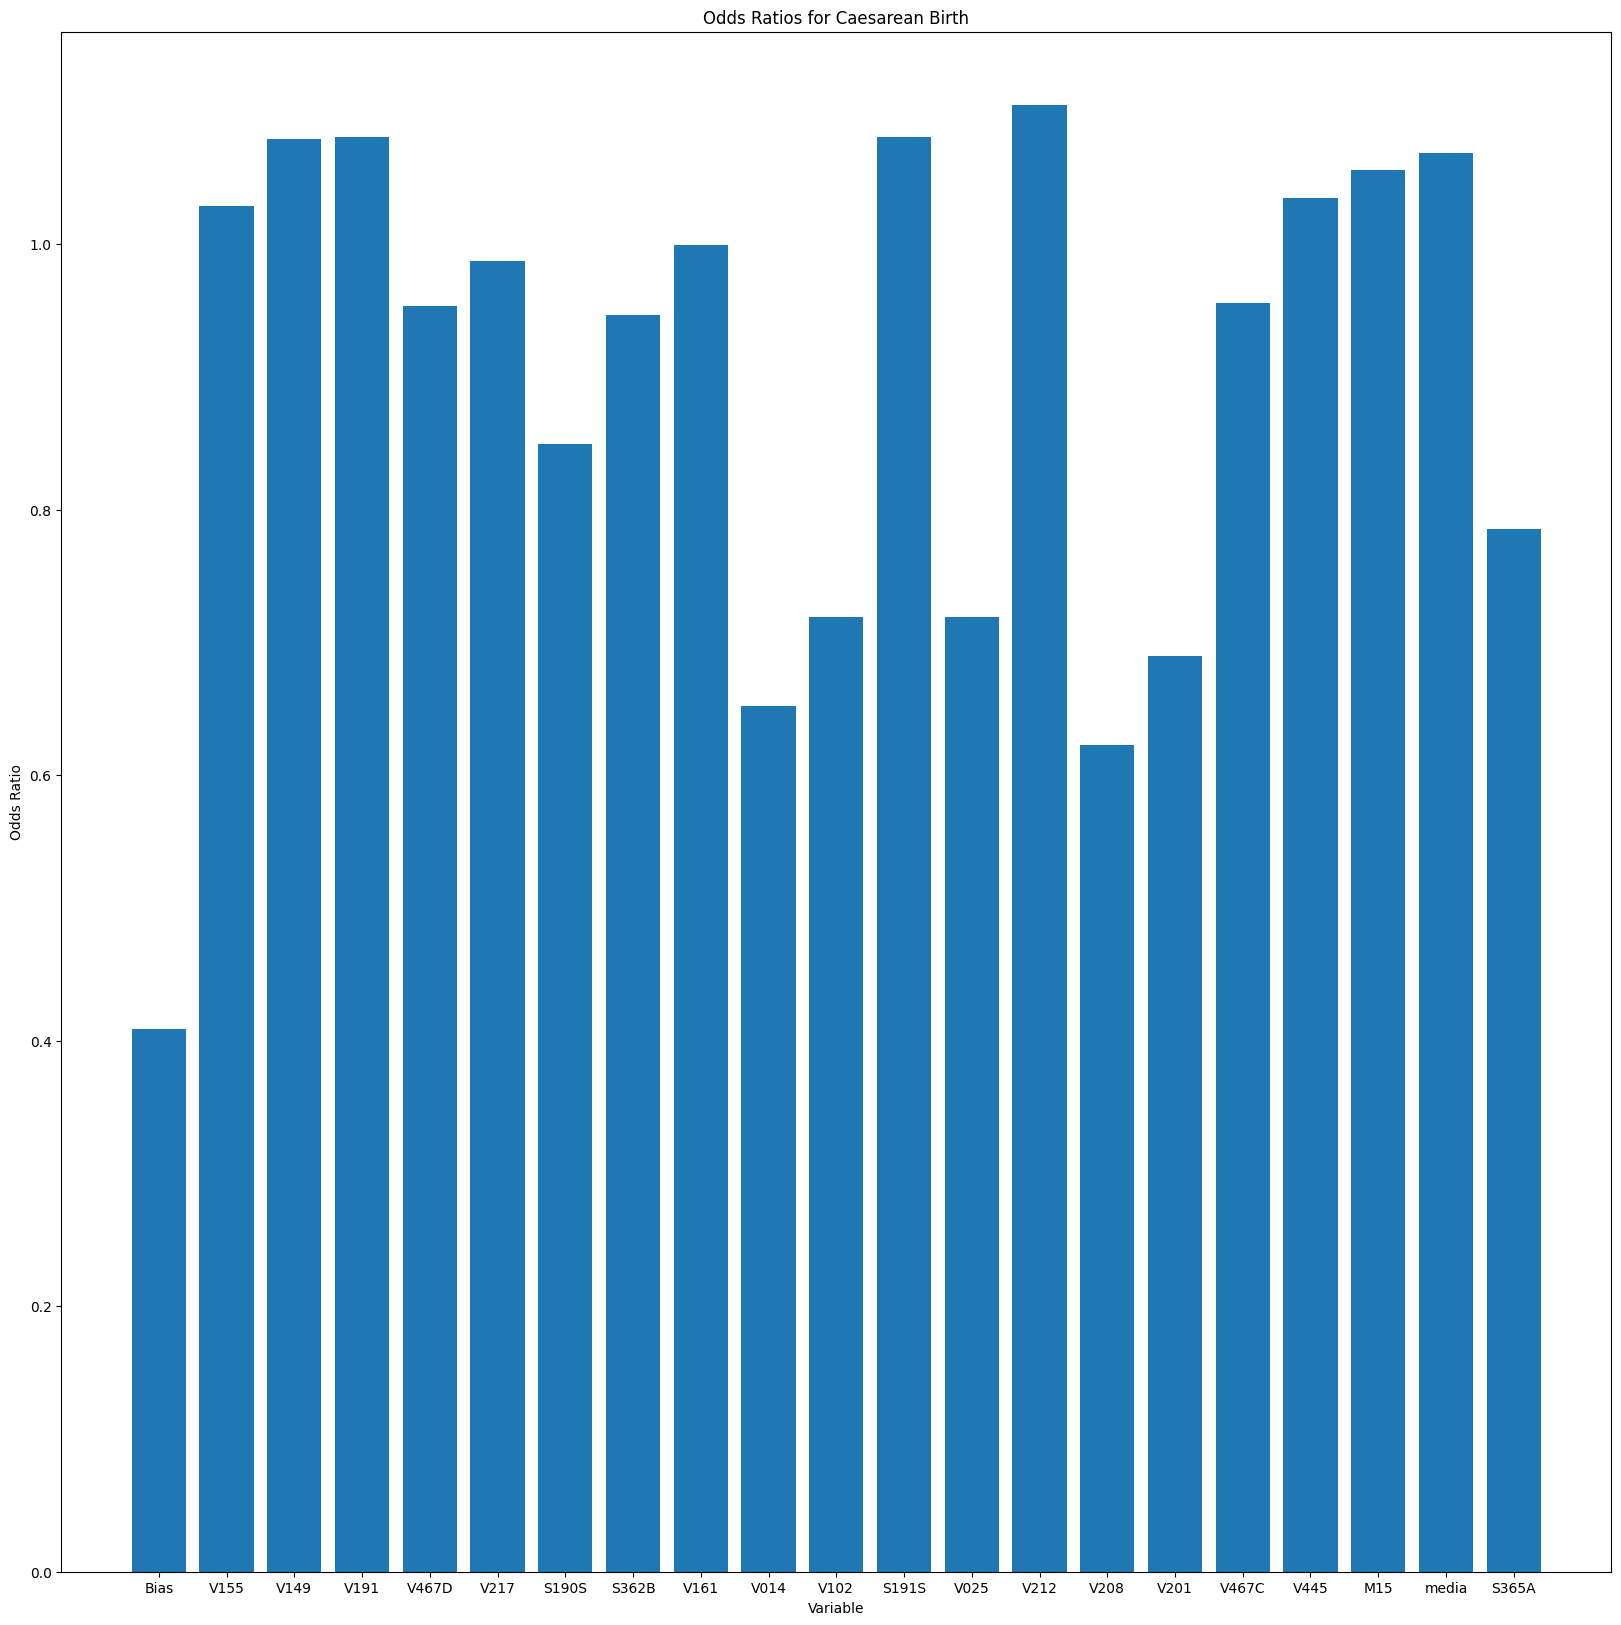

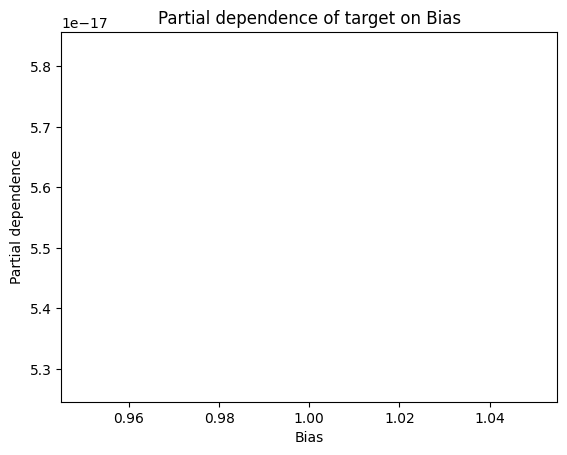

<Figure size 2000x2000 with 0 Axes>

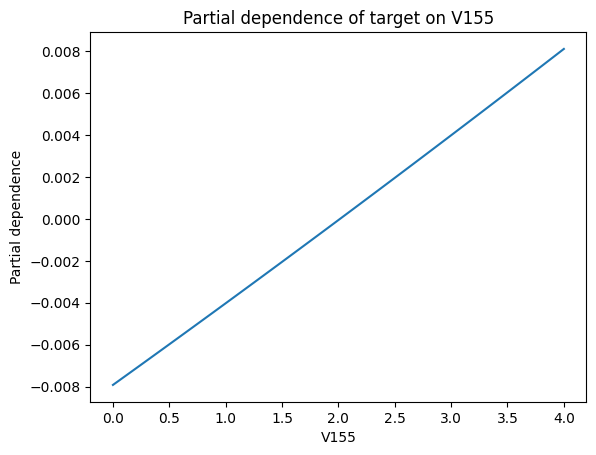

<Figure size 2000x2000 with 0 Axes>

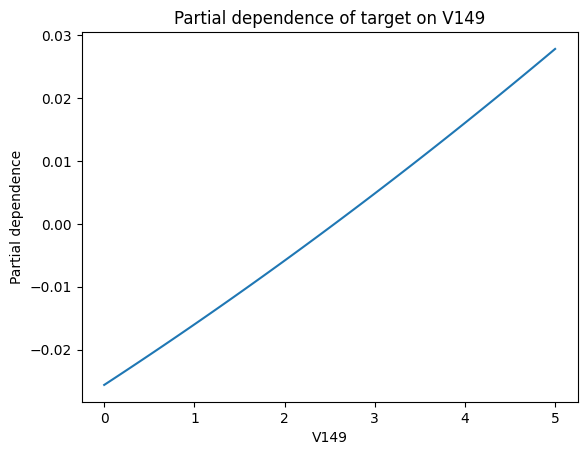

<Figure size 2000x2000 with 0 Axes>

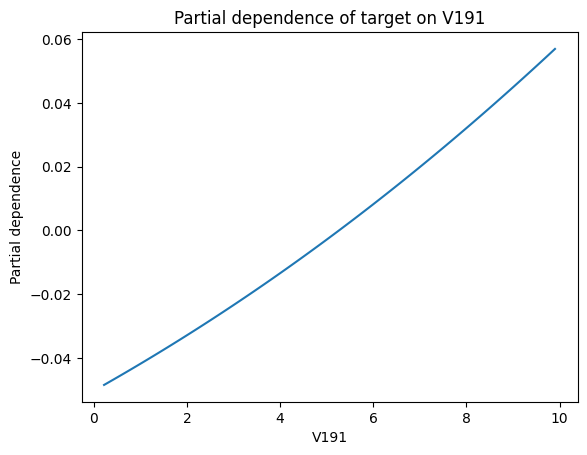

<Figure size 2000x2000 with 0 Axes>

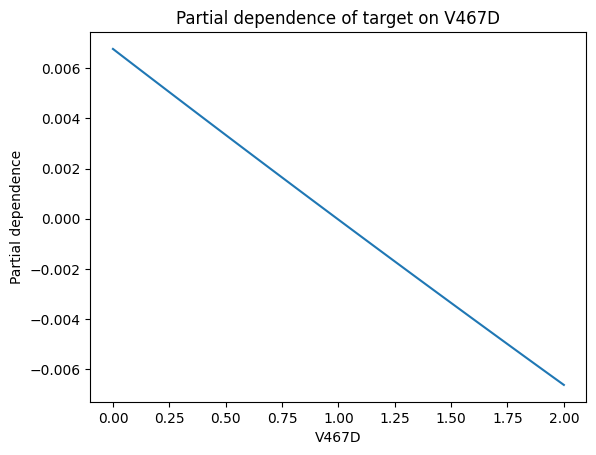

<Figure size 2000x2000 with 0 Axes>

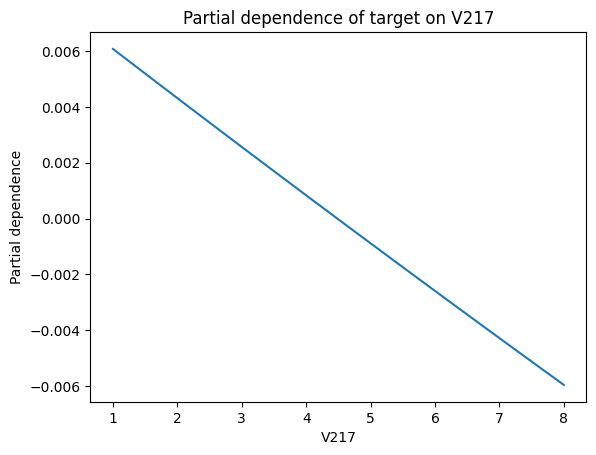

<Figure size 2000x2000 with 0 Axes>

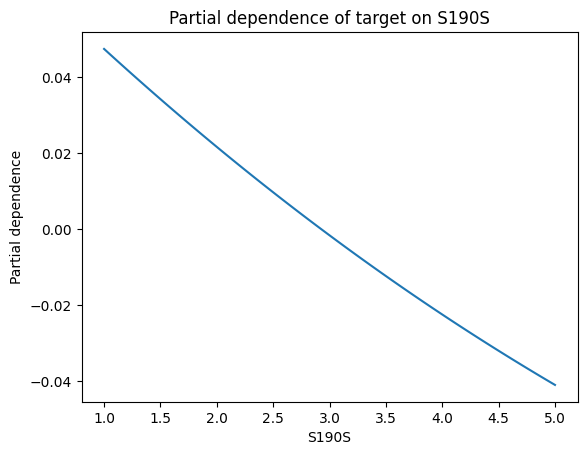

<Figure size 2000x2000 with 0 Axes>

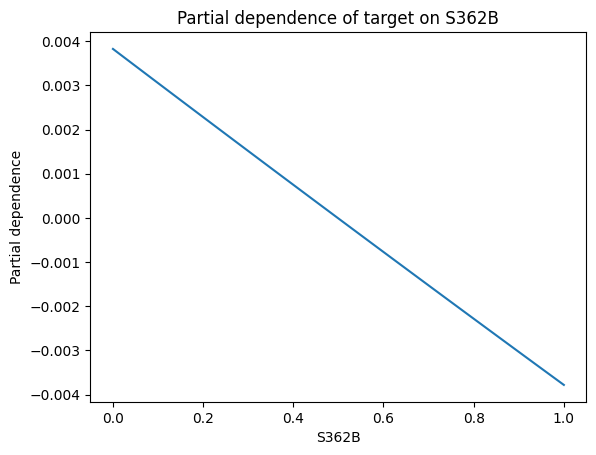

<Figure size 2000x2000 with 0 Axes>

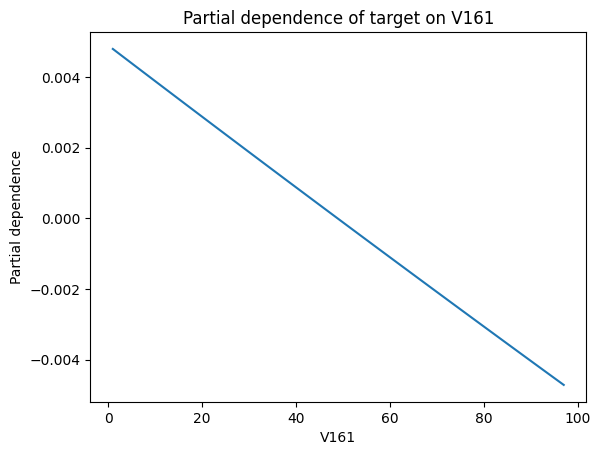

<Figure size 2000x2000 with 0 Axes>

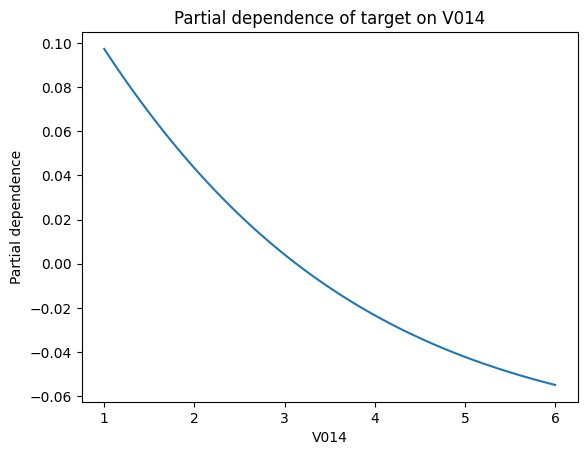

<Figure size 2000x2000 with 0 Axes>

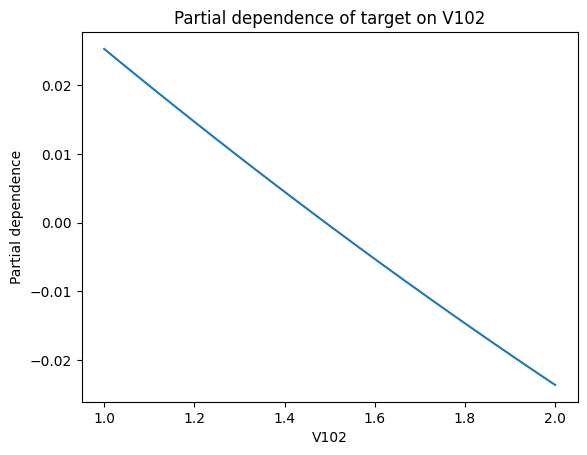

<Figure size 2000x2000 with 0 Axes>

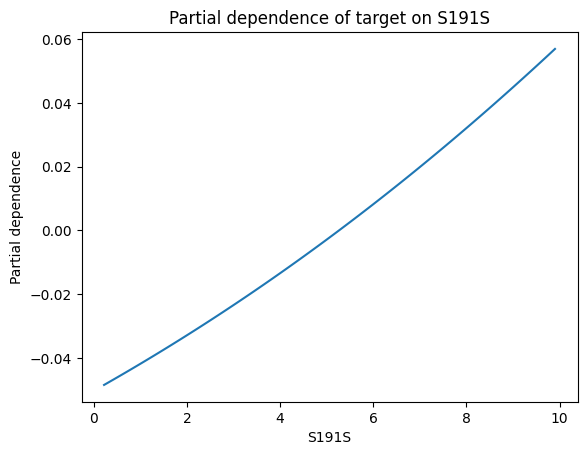

<Figure size 2000x2000 with 0 Axes>

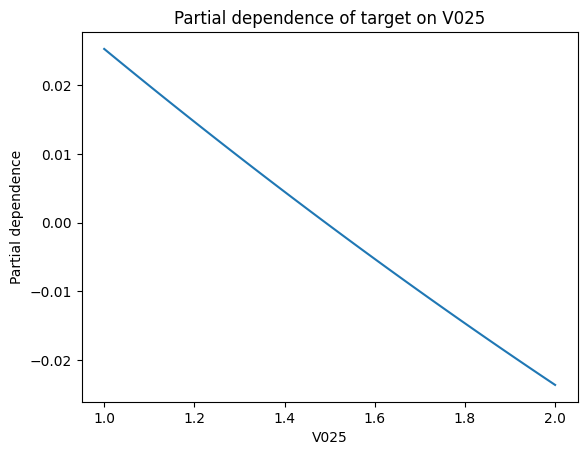

<Figure size 2000x2000 with 0 Axes>

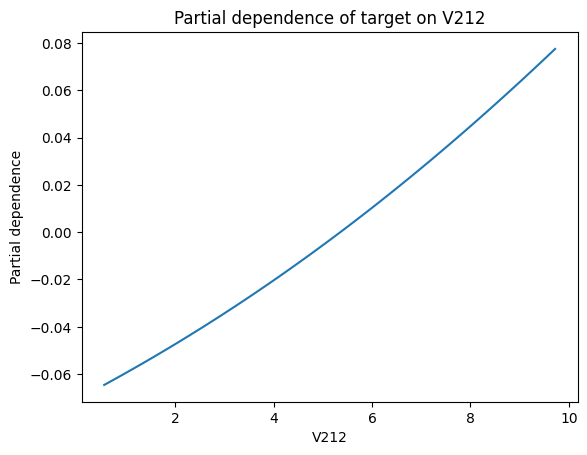

<Figure size 2000x2000 with 0 Axes>

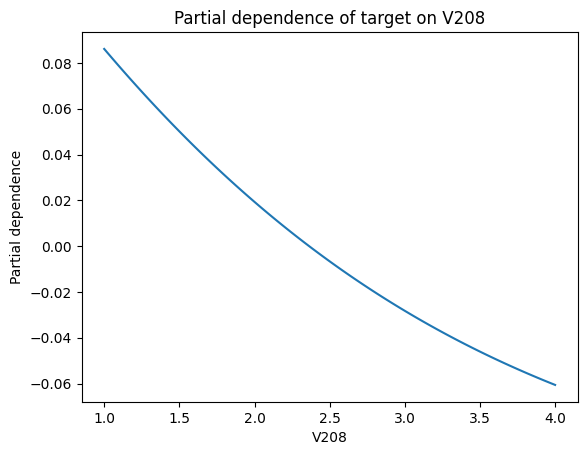

<Figure size 2000x2000 with 0 Axes>

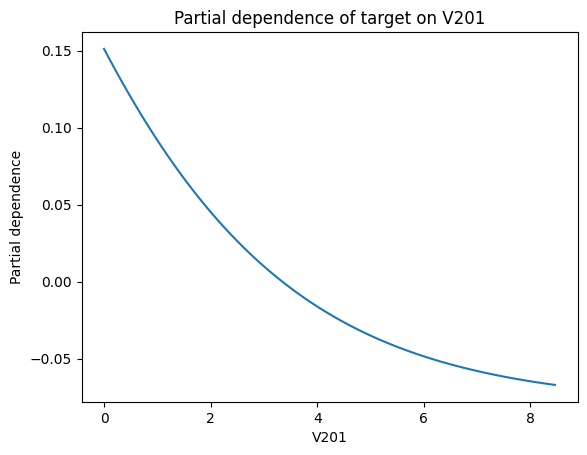

<Figure size 2000x2000 with 0 Axes>

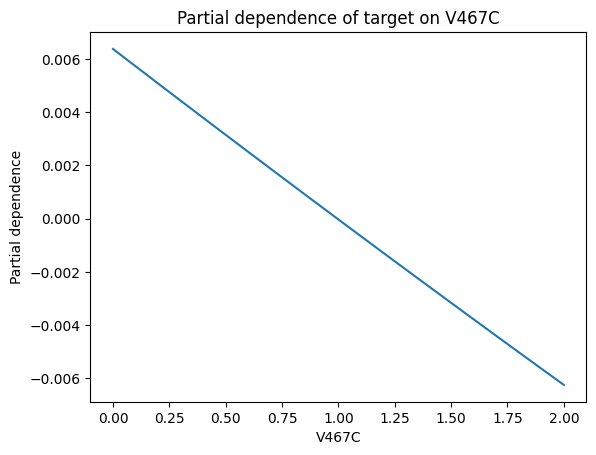

<Figure size 2000x2000 with 0 Axes>

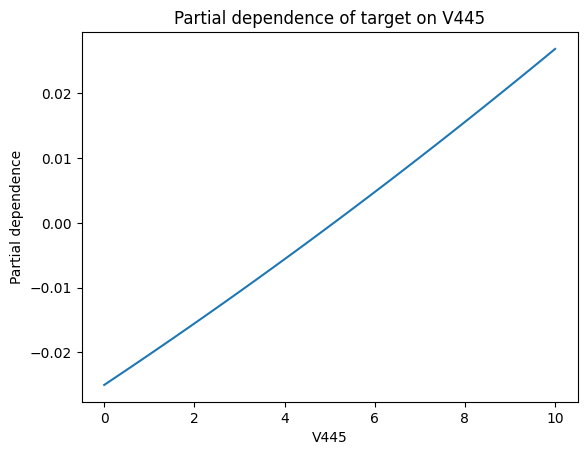

<Figure size 2000x2000 with 0 Axes>

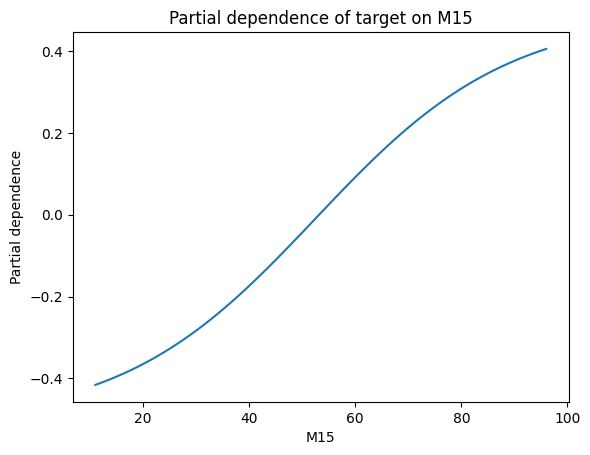

<Figure size 2000x2000 with 0 Axes>

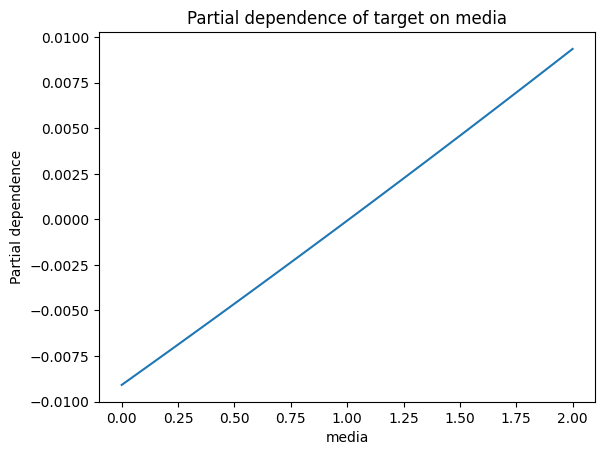

<Figure size 2000x2000 with 0 Axes>

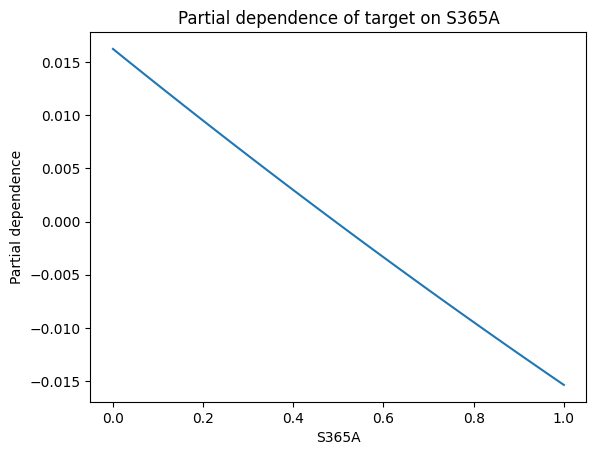

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# Get the coefficients and p-values from the logistic regression model
coefficients = weights
p_values = stats.norm.sf(abs(coefficients) / 2) * 2

# Create a DataFrame to store the coefficients and p-values
coefficients_df = pd.DataFrame({'Variable': feature_set, 'Coefficient': coefficients, 'P-value': p_values})

# Print the coefficients and p-values
print(coefficients_df)

# Calculate the odds ratios and confidence intervals
odds_ratios = np.exp(coefficients)
lower_ci = np.exp(coefficients - 1.96 * np.std(coefficients))
upper_ci = np.exp(coefficients + 1.96 * np.std(coefficients))

# Create a DataFrame to store the odds ratios and confidence intervals
odds_ratio_df = pd.DataFrame({'Variable': feature_set, 'Odds Ratio': odds_ratios, 'Lower CI': lower_ci, 'Upper CI': upper_ci})

# Print the odds ratios and confidence intervals
print(odds_ratio_df)

# Create a bar chart of the odds ratios
plt.subplots(figsize=(20,20))
plt.bar(feature_set, odds_ratios)
plt.xlabel('Variable')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios for Caesarean Birth')
plt.show()

# Create a partial dependence plot for the mother's age variable
from sklearn.inspection import partial_dependence


# Define function to calculate logistic regression probabilities
def logistic_regression_probabilities(X, weights):
    log_odds = np.dot(X, weights)
    probabilities = 1 / (1 + np.exp(-log_odds))
    return probabilities

# Define function to calculate partial dependence
def calculate_partial_dependence(X, feature_index, weights):
    # Set feature values to average values
    X_constant = np.mean(X, axis=0)
    # Create grid of feature values to vary
    grid = np.linspace(np.min(X[:, feature_index]), np.max(X[:, feature_index]), num=100)
    # Copy X_constant for each grid point
    X_grid = np.tile(X_constant, (len(grid), 1))
    # Set the feature values to vary according to the grid
    X_grid[:, feature_index] = grid
    # Calculate logistic regression probabilities for each grid point
    probabilities = logistic_regression_probabilities(X_grid, weights)
    # Calculate the average probability across all samples
    average_probability = np.mean(probabilities)
    # Calculate the partial dependence values for each grid point
    partial_dependence_values = probabilities - average_probability
    return grid, partial_dependence_values

# Define function to plot partial dependence
def plot_partial_dependence(X, feature_names, feature_index, weights):
    grid, partial_dependence_values = calculate_partial_dependence(X, feature_index, weights)
    plt.plot(grid, partial_dependence_values)
    plt.xlabel(feature_names[feature_index])
    plt.ylabel('Partial dependence')
    plt.title('Partial dependence of target on ' + feature_names[feature_index])
    plt.figure(figsize=(20,20))
    plt.show()

# Plot partial dependence for each feature
for i in range(X_train.shape[1]):
    plot_partial_dependence(X_train, feature_set, i, weights)

Clustering

## Implementing Naive Bayes

In [ ]:
fdf[selected_features]
fdf['V439'] = fdf['V439'].fillna(fdf['V439'].mean())
fdf['V439'] = (fdf['V439'] - fdf['V439'].min()) / (fdf['V439'].max() - fdf['V439'].min())*10
fdf[selected_features]

,V155,V149,V191,V467D,V217,S190S,S362B,V161,V014,V102,...,M17,V025,V212,V208,V201,V467C,V445,M15,media,S365A
5341,2.0,3.0,7.646024,0.0,5.0,5.0,0.0,2.0,1.0,2.0,...,0.0,2.0,3.055556,2.0,1.538462,0.0,1.198136,21.0,1,0.0
663,0.0,0.0,4.110327,1.0,5.0,1.0,1.0,8.0,1.0,2.0,...,0.0,2.0,4.722222,2.0,1.538462,2.0,1.207230,21.0,1,0.0
876,1.0,3.0,6.956362,2.0,4.0,4.0,1.0,2.0,1.0,2.0,...,0.0,2.0,6.944444,1.0,0.769231,2.0,1.634648,21.0,2,1.0
2596,0.0,3.0,5.311860,0.0,5.0,2.0,0.0,1.0,1.0,2.0,...,1.0,2.0,3.611111,1.0,0.000000,0.0,1.408435,21.0,0,0.0
3536,2.0,3.0,3.867037,2.0,2.0,1.0,0.0,8.0,1.0,2.0,...,0.0,2.0,4.722222,2.0,1.538462,2.0,1.518700,21.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232413,2.0,5.0,5.223105,1.0,8.0,3.0,1.0,2.0,1.0,2.0,...,1.0,2.0,3.888889,1.0,0.769231,0.0,2.006366,21.0,2,0.0
232744,0.0,0.0,3.288638,1.0,5.0,1.0,0.0,8.0,1.0,2.0,...,0.0,2.0,3.333333,1.0,0.000000,1.0,1.705127,25.0,2,0.0
232832,2.0,5.0,6.084458,0.0,2.0,4.0,0.0,1.0,1.0,2.0,...,0.0,2.0,3.611111,1.0,0.769231,0.0,2.371263,24.0,0,0.0
232619,0.0,0.0,6.411450,0.0,5.0,4.0,1.0,2.0,1.0,1.0,...,1.0,1.0,3.611111,1.0,0.000000,0.0,1.057179,21.0,2,0.0


In [ ]:
ls = ['V212', 'V217', 'V467D', 'V025', 'V149', 'V211', 'V155', 'V102', 'V201', 'V191', 'V401', 'S365A', 'M15', 'M17', 'V457', 'V208', 'V014', 'V467C', 'S190S', 'V445', 'media', 'V439', 'S362B', 'S191S', 'V161']
for i in ls:
    if i not in selected_features:
        selected_features.append(i)
newdf = fdf[selected_features]

In [ ]:
print(selected_features)

['V155', 'V149', 'V191', 'V467D', 'V217', 'S190S', 'S362B', 'V161', 'V014', 'V102', 'S191S', 'M17', 'V025', 'V212', 'V208', 'V201', 'V467C', 'V445', 'M15', 'media', 'S365A', 'V211', 'V401', 'V457', 'V439']


In [ ]:
if "M17" not in selected_features:
    selected_features.append("M17")
newdf = fdf[selected_features]

In [ ]:
train_data = newdf.sample(frac = 0.67, random_state = 1)
test_data = newdf.drop(train_data.index)

#Seperate the independent and taget variables in the training and testing sets
X_train = train_data.drop('M17', axis=1)
y_train = train_data['M17']
X_test = test_data.drop('M17', axis=1)
y_test = test_data['M17']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39010, 24) (39010,) (19214, 24) (19214,)


In [ ]:
#Implementation of Naive Bayes
class NaiveBayes:
    def __init__(self):
        self.prior = None
        self.conditional = None
        self.classes = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.prior = np.zeros(n_classes)
        self.conditional = np.zeros((n_classes, n_features))

        for i, c in enumerate(self.classes):
            X_c = X[c==y]
            self.prior[i] = X_c.shape[0] / n_samples
            self.conditional[i,:] = X_c.sum(axis=0) / X_c.sum()
            print("xcsum", X_c.sum())
            print(self.conditional)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred

    def _predict(self, x):
        posteriors = []

        for i, c in enumerate(self.classes):
            prior_c = np.log(self.prior[i])
            conditional_c = np.sum(np.log(self.conditional[i,:]) * x)
            posterior = prior_c + conditional_c
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]
    
    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy
    
    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
    
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))
        
        sns.countplot(x=target, data=tr, ax=ax[0], alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], alpha=0.7, hue=target, dodge=False)
        fig.suptitle('Comparison b/w true and predicted values', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        plt.show()

In [ ]:
#Training the classifier on X_test and finding predictions for y_train
nb_classifier = NaiveBayes()
nb_classifier.fit(X_train.values, y_train.values)
y_pred = nb_classifier.predict(X_test.values)
#Finding accuracy of the predicted data
print("Accuracy Score:", nb_classifier.accuracy(y_test, y_pred))

xcsum 45536901.963551395
[[8.51441322e-04 1.52583942e-03 3.23112936e-03 7.10368923e-04
  2.13090913e-03 1.79142622e-03 3.16688211e-04 6.88992853e-03
  8.08267546e-04 1.26547915e-03 3.23112936e-03 1.26547915e-03
  2.32986864e-03 1.09289385e-03 8.24893115e-04 6.34759915e-04
  8.91897354e-04 1.54345370e-02 7.61228773e-04 8.45028940e-05
  9.50983755e-01 8.21311912e-06 2.24863782e-03 6.86726606e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
xcsum 10847214.6889544
[[8.51441322e-04 1.52583942e-03 3.23112936e-03 7.10368923e-04
  2.13090913e-03 1.79142622e-03 3.16688211e-04 6.88992853e-03
  8.08267546e-04 1.26547915e-03 3.23112936e-03 1.26547915e-03
  2.32986864e-03 1.

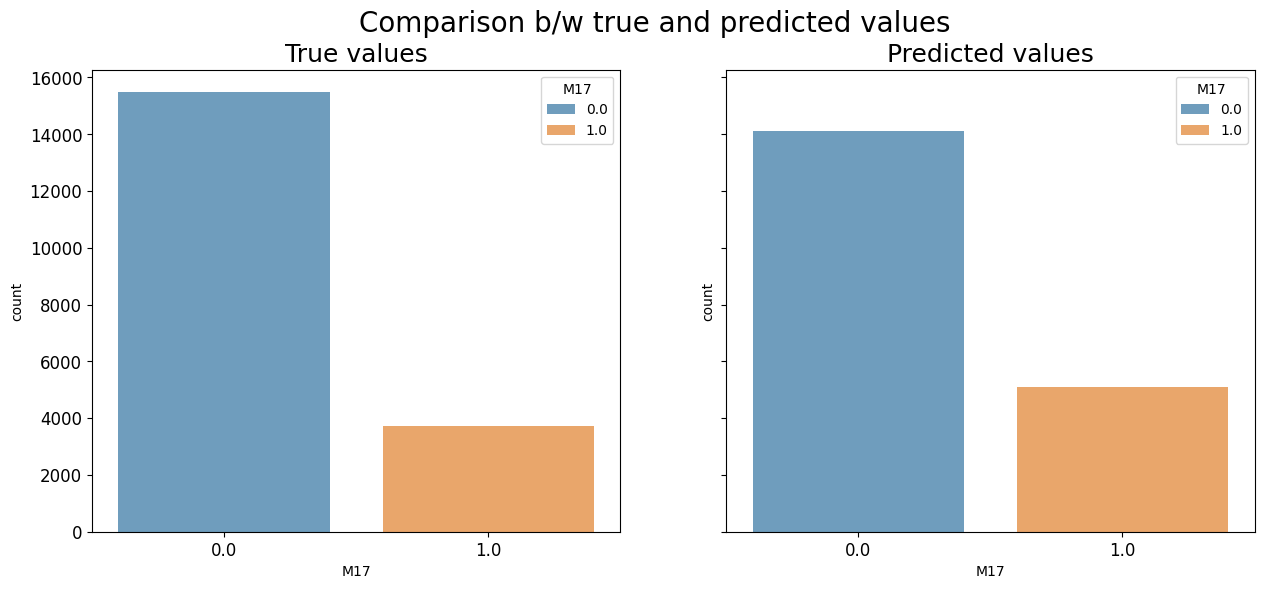

In [ ]:
#Visualising the predicted and true values
nb_classifier.visualize(y_test, y_pred, "M17")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[3.56625637 1.24984082 5.48991443 1.56949638 6.40201797 0.7151328
  1.06730508 0.0443154  3.70308114 2.10939622 0.80249932 0.71666603
  0.93373004 1.53138699 1.44499263 2.64612779 6.40201797]
 [3.67928135 1.88284074 1.96919308 1.51685841 3.39598816 1.47652424
  1.19011213 0.07315124 3.205198   2.41946414 1.3293022  0.47519469
  0.72875188 1.16067327 1.48955975 3.78505428 3.39598816]]
[0 1 0 ... 0 1 0]
The accuracy is:  80.90134652377027


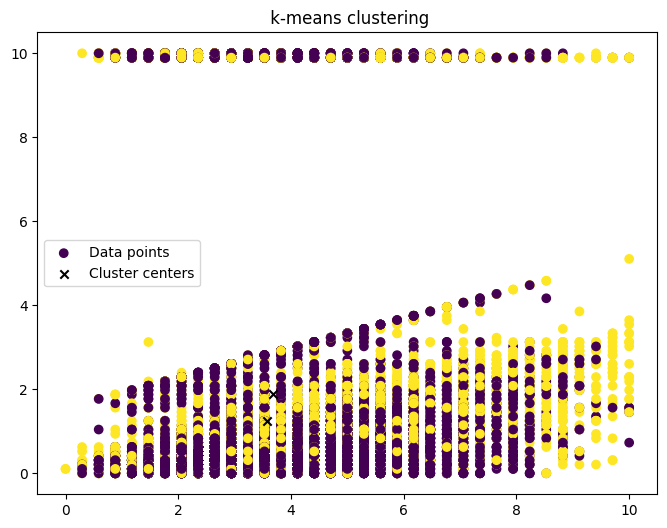

In [ ]:
kmeans = KMeans(n_clusters=2)
data=fdf[continous_cols].to_numpy()
kmeans.fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
correct_answer = 0
assigned_labels = np.zeros_like(labels)
for i in range(2):
    mask = labels == i
    assigned_labels[mask] = np.bincount(y[mask]).argmax()
accuracy = np.mean(assigned_labels == y) * 100
print("The accuracy is: ", accuracy)
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(data[:, 0], data[:, 1], c=labels)
centers = ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x')
ax.legend((scatter, centers), ('Data points', 'Cluster centers'))
ax.set_title(' k-means clustering')
plt.show()

